Below I generated 500 Images of circles in different sizes.

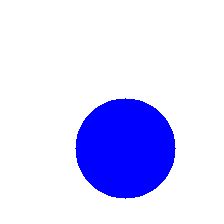

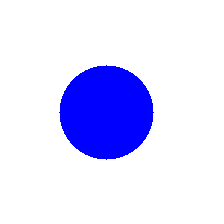

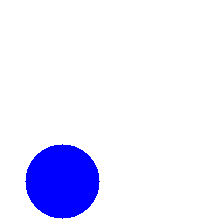

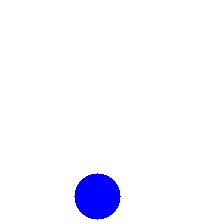

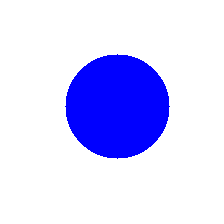

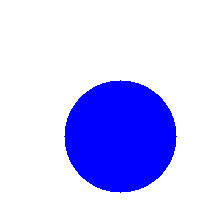

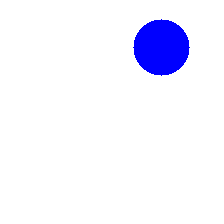

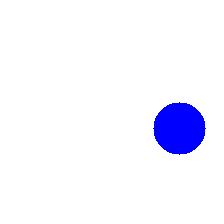

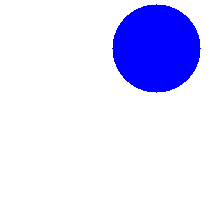

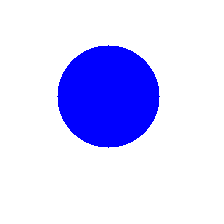

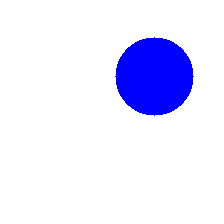

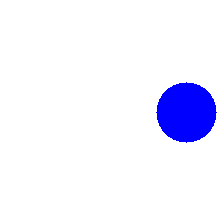

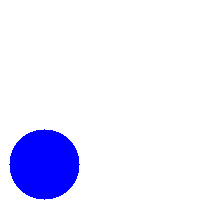

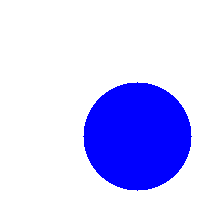

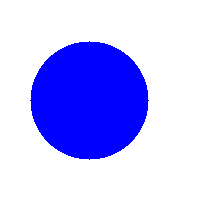

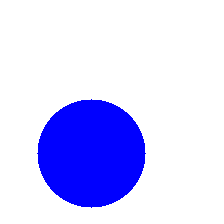

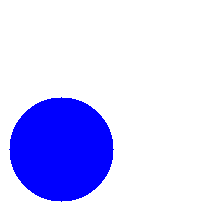

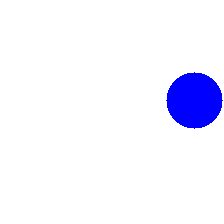

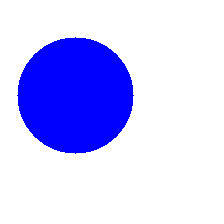

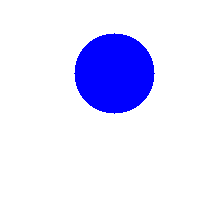

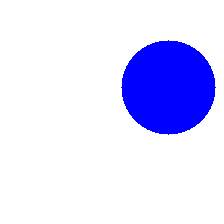

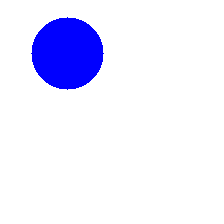

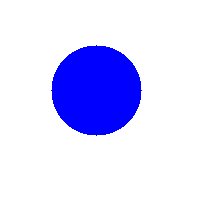

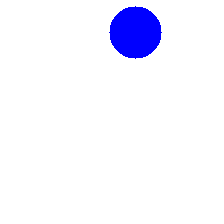

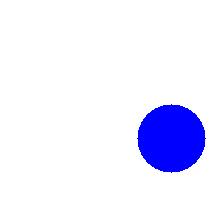

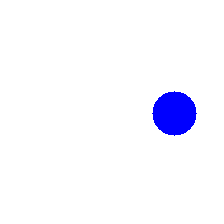

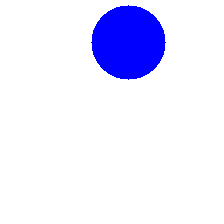

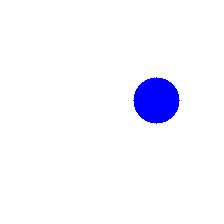

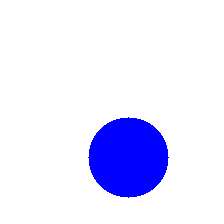

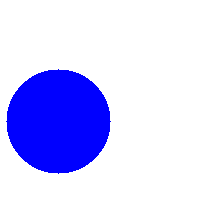

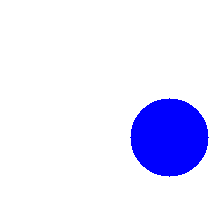

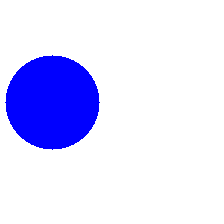

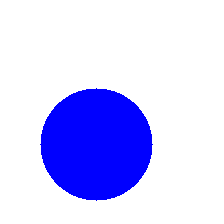

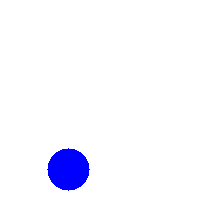

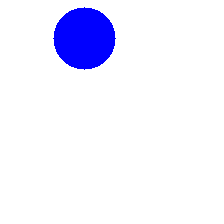

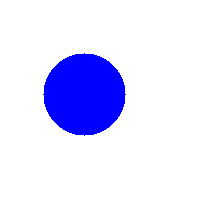

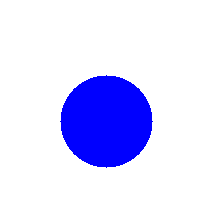

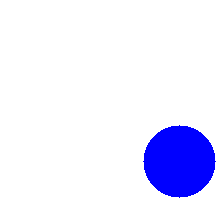

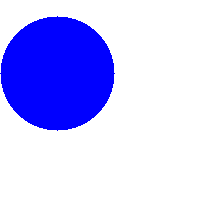

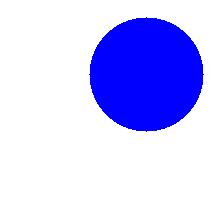

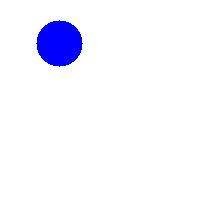

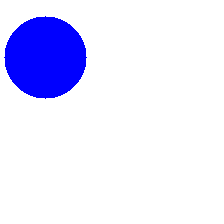

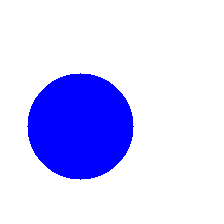

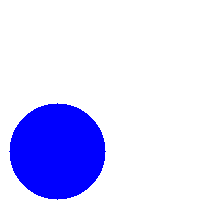

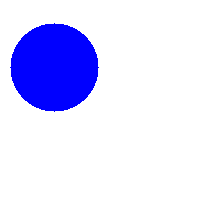

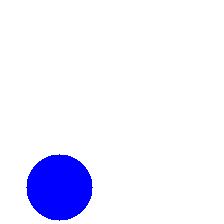

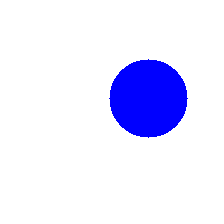

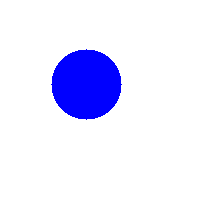

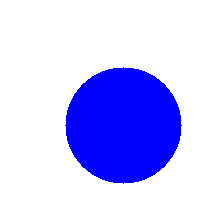

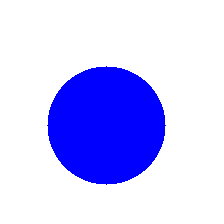

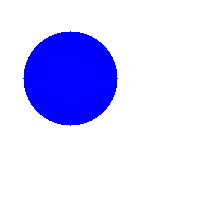

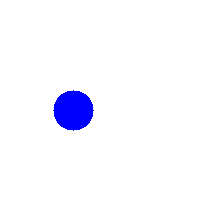

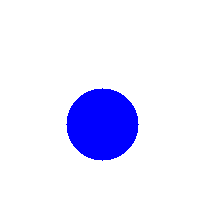

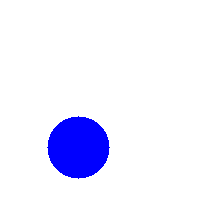

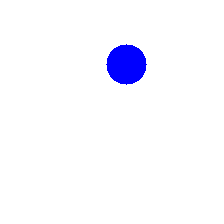

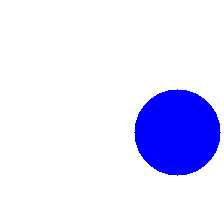

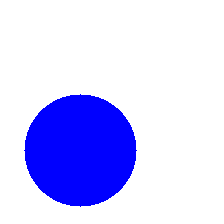

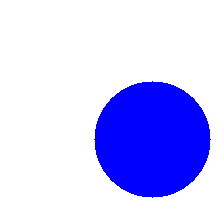

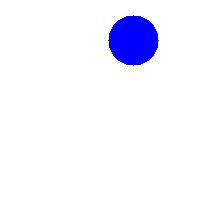

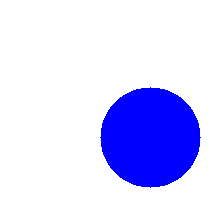

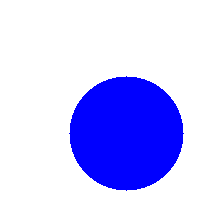

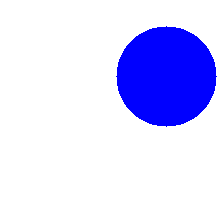

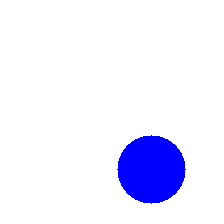

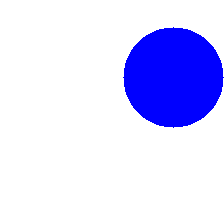

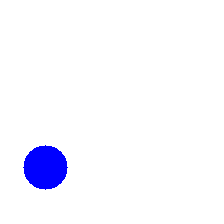

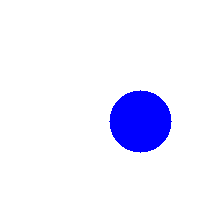

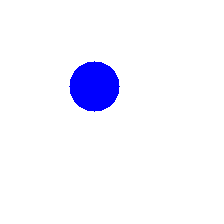

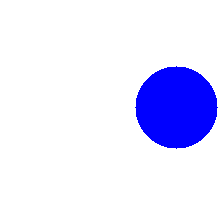

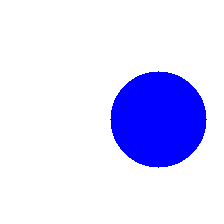

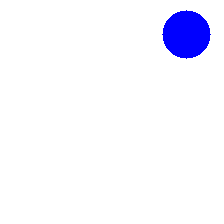

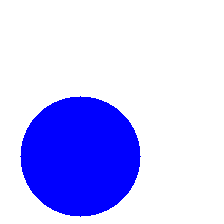

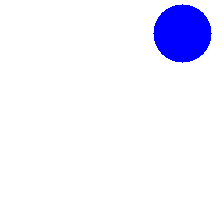

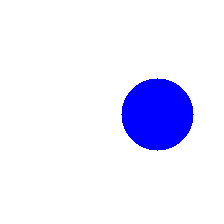

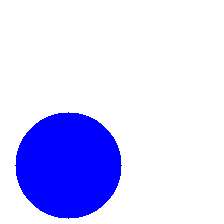

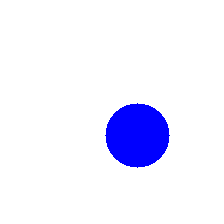

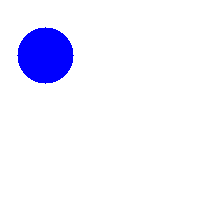

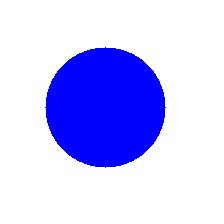

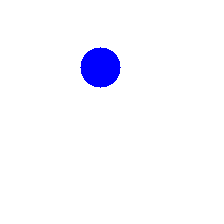

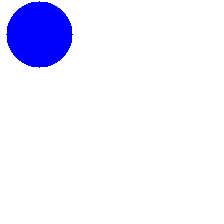

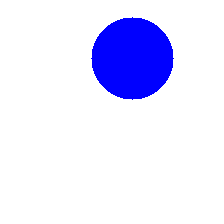

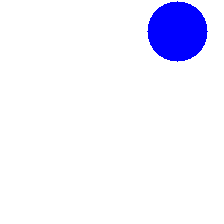

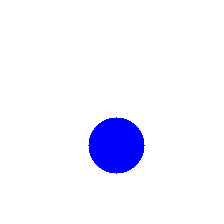

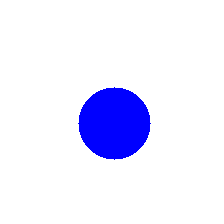

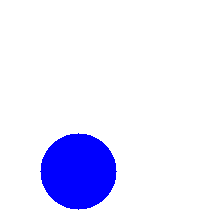

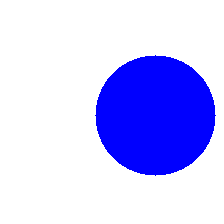

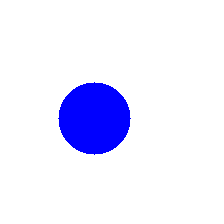

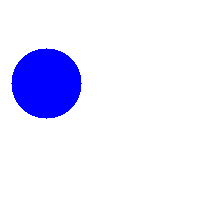

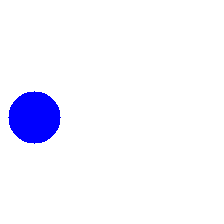

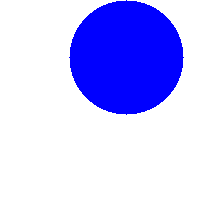

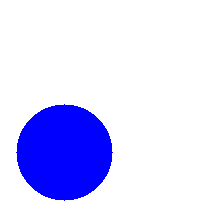

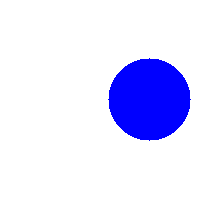

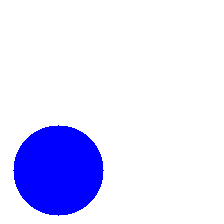

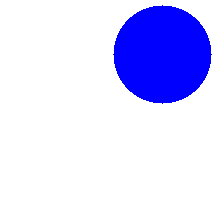

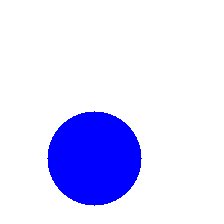

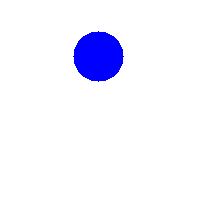

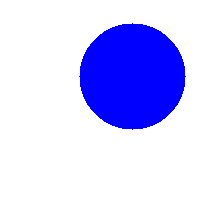

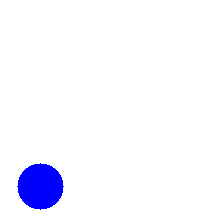

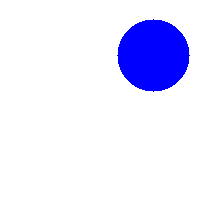

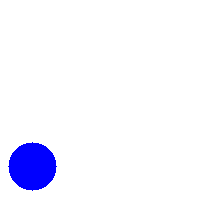

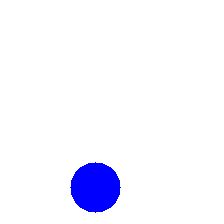

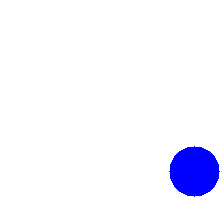

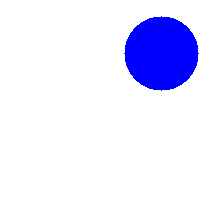

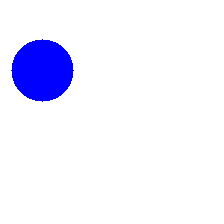

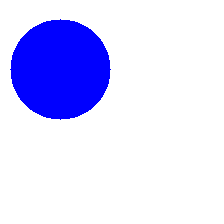

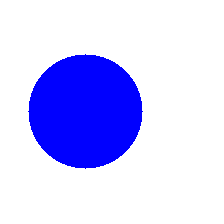

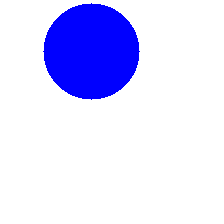

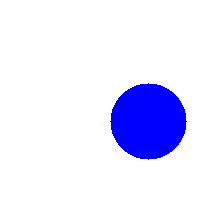

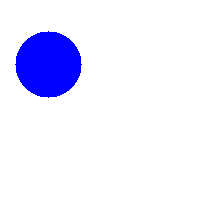

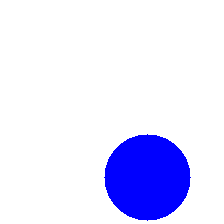

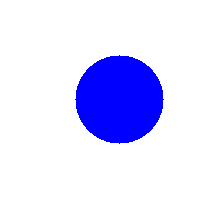

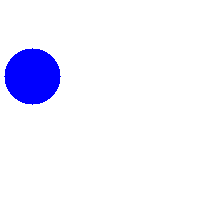

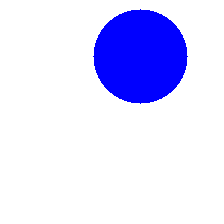

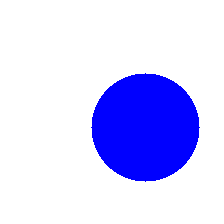

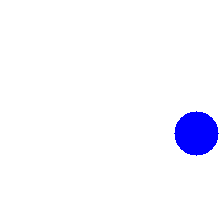

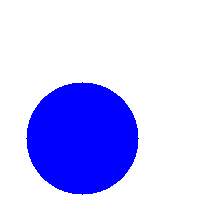

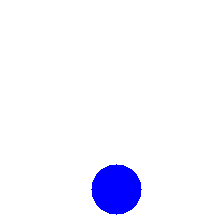

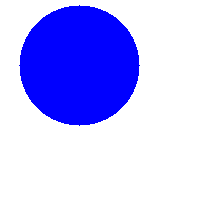

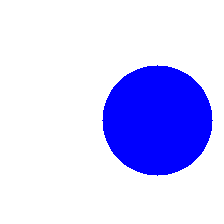

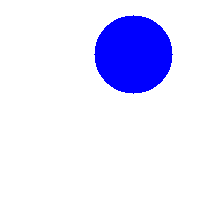

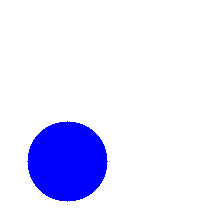

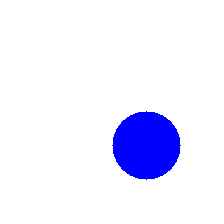

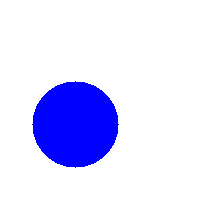

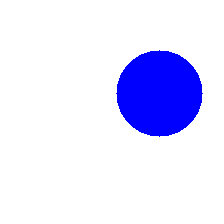

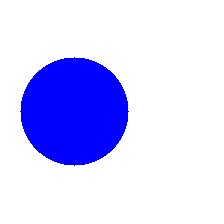

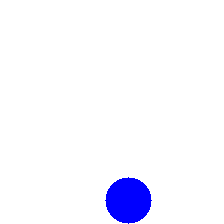

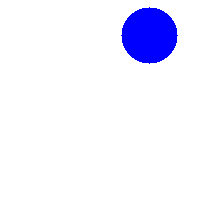

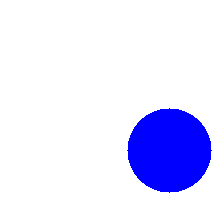

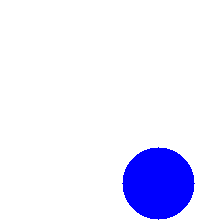

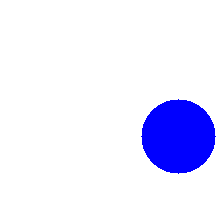

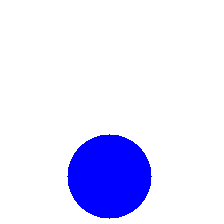

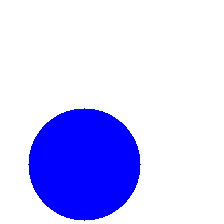

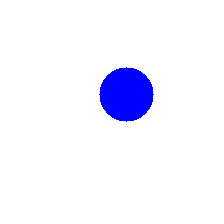

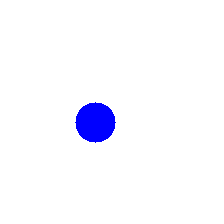

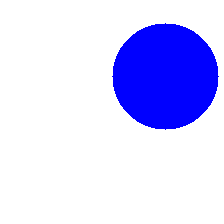

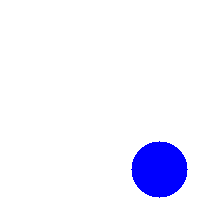

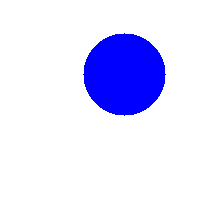

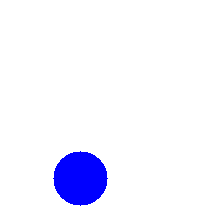

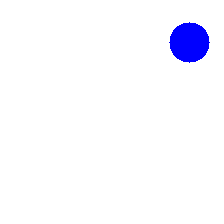

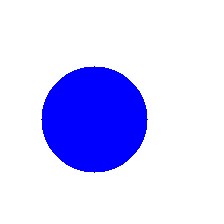

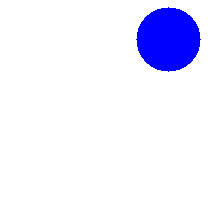

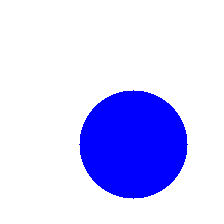

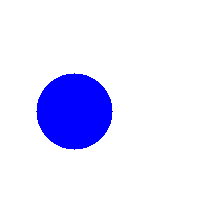

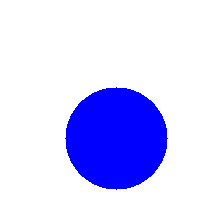

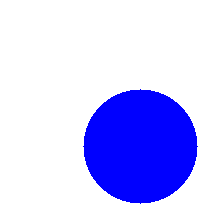

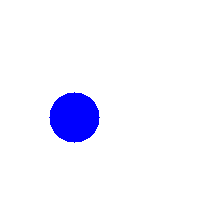

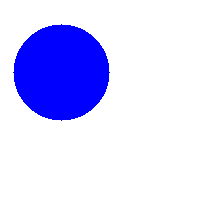

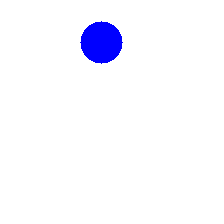

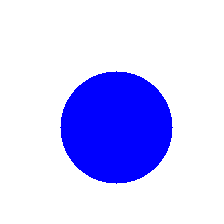

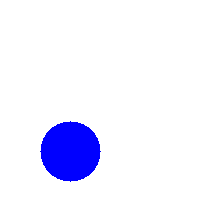

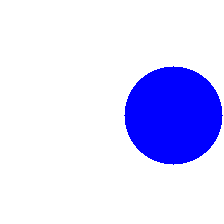

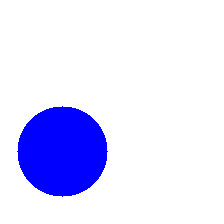

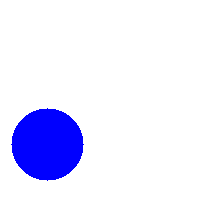

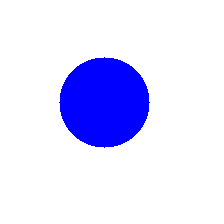

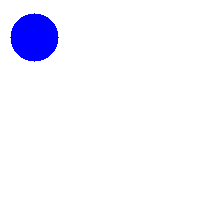

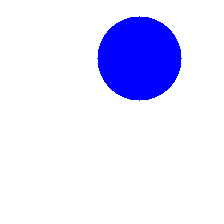

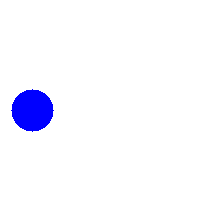

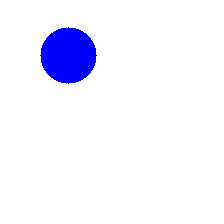

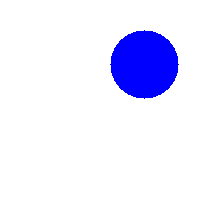

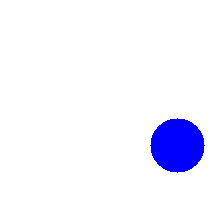

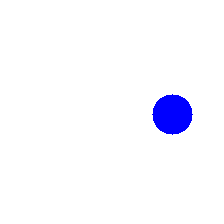

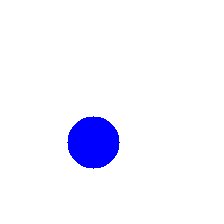

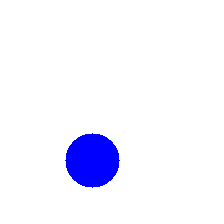

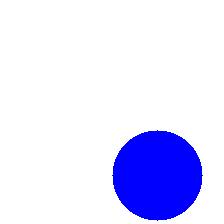

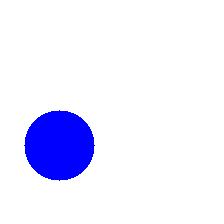

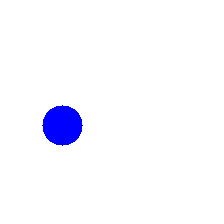

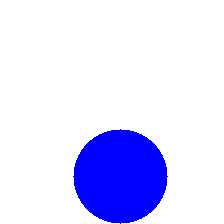

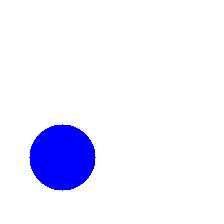

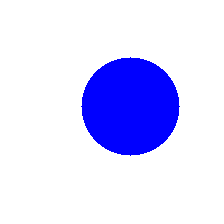

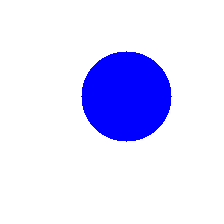

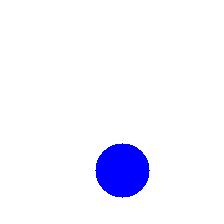

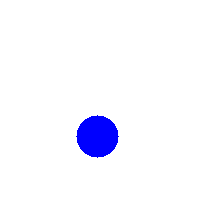

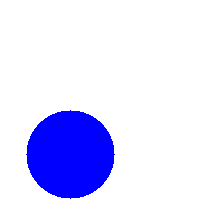

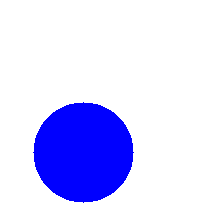

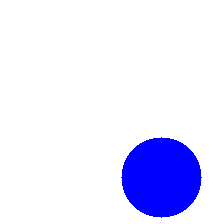

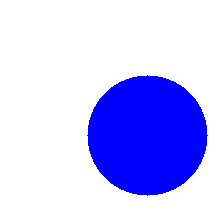

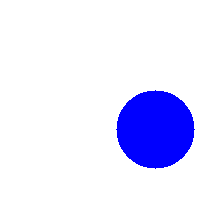

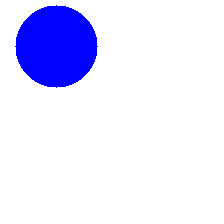

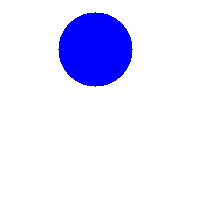

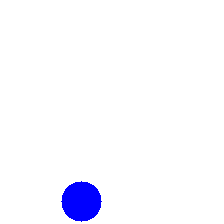

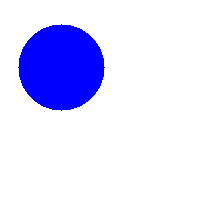

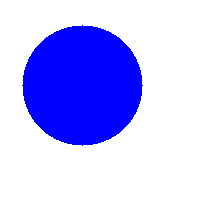

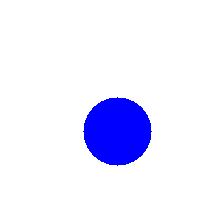

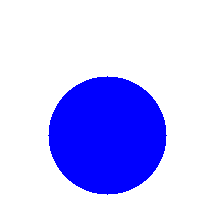

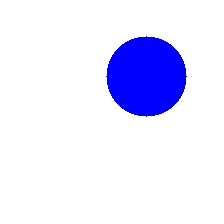

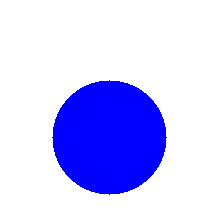

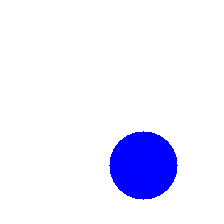

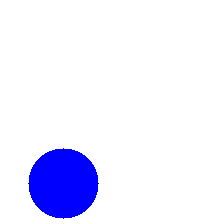

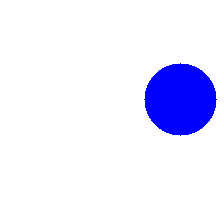

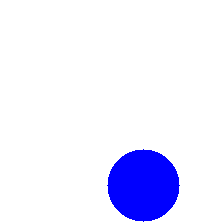

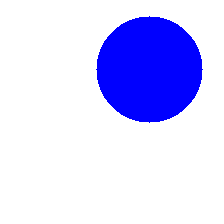

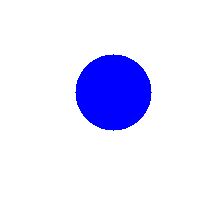

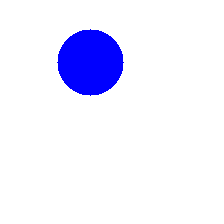

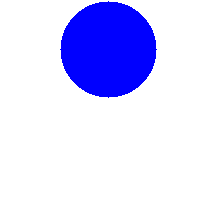

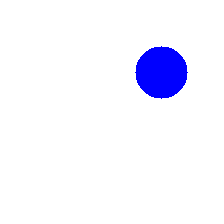

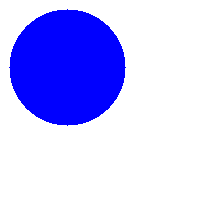

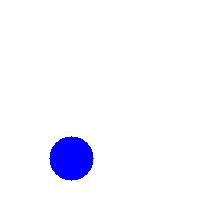

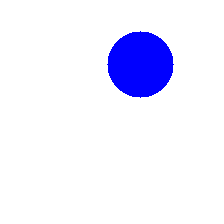

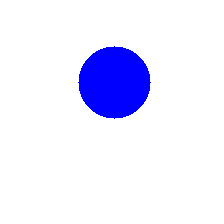

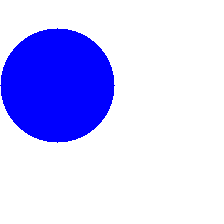

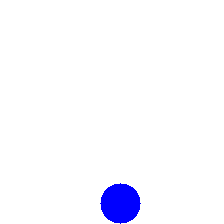

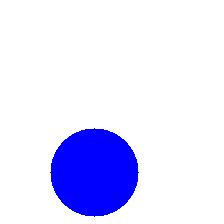

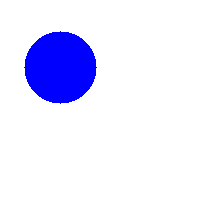

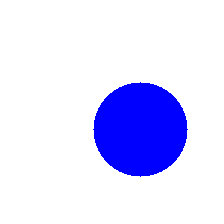

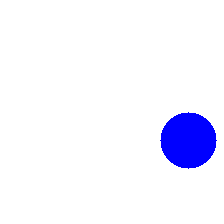

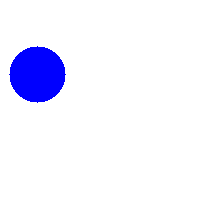

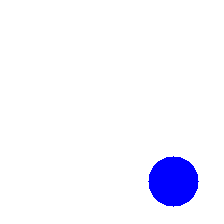

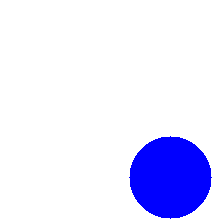

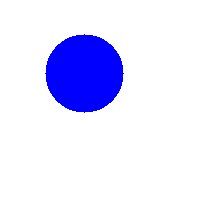

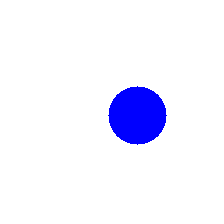

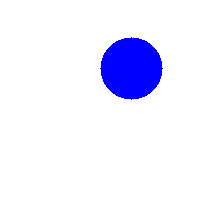

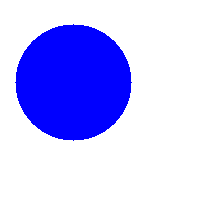

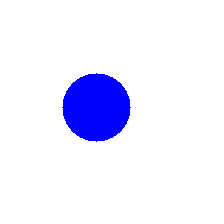

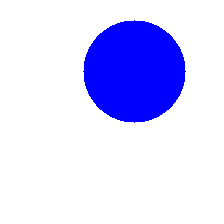

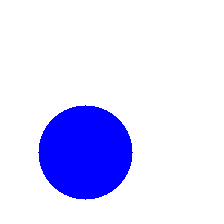

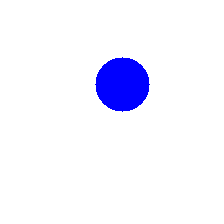

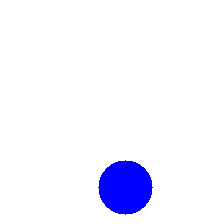

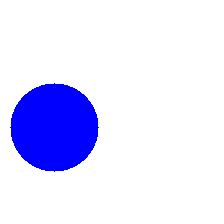

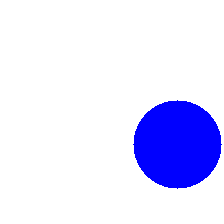

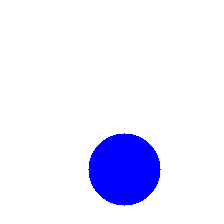

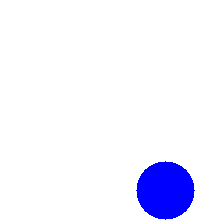

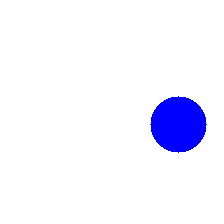

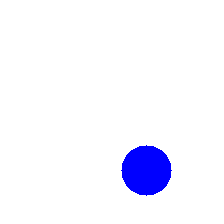

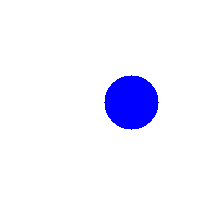

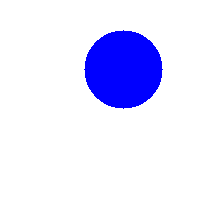

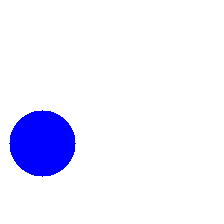

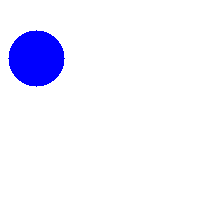

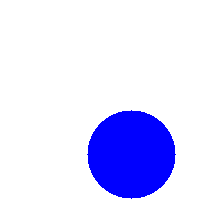

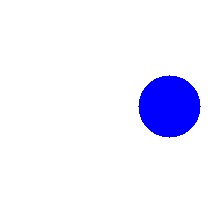

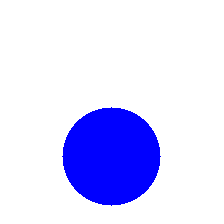

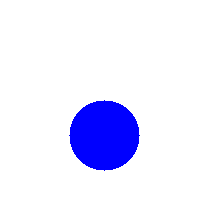

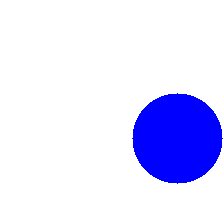

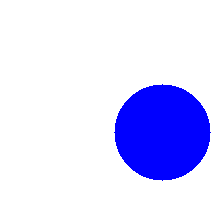

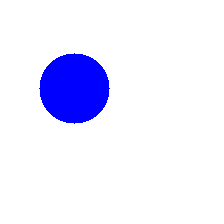

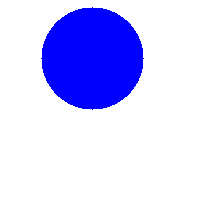

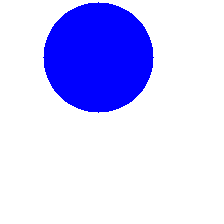

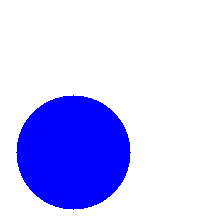

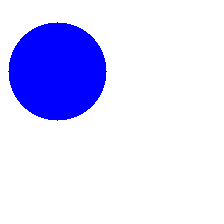

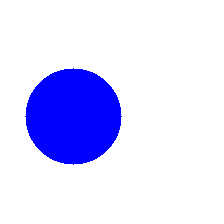

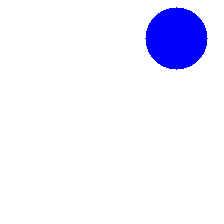

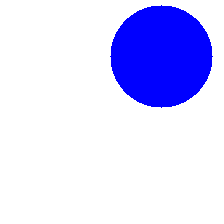

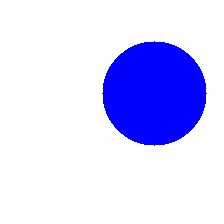

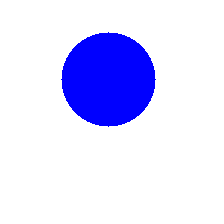

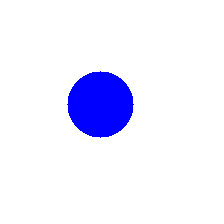

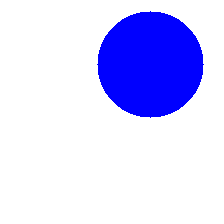

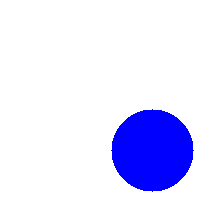

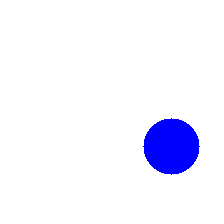

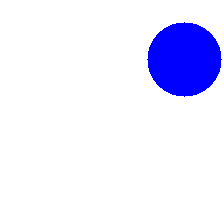

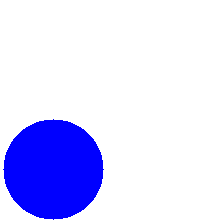

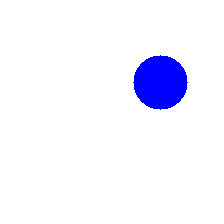

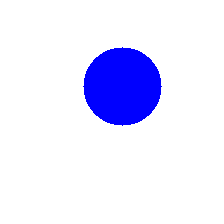

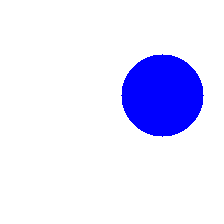

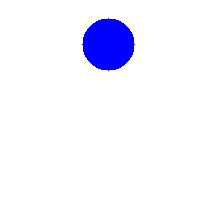

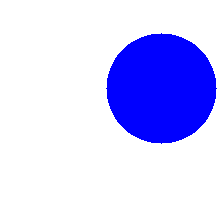

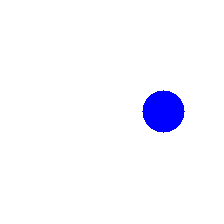

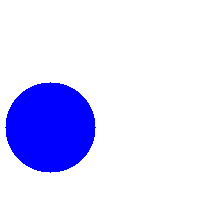

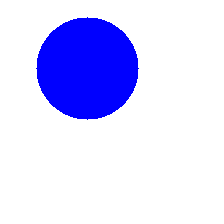

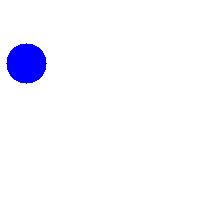

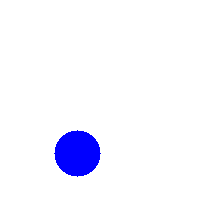

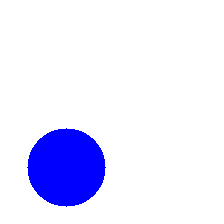

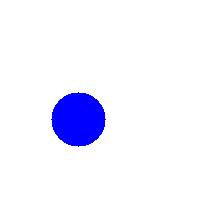

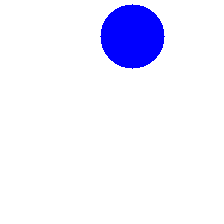

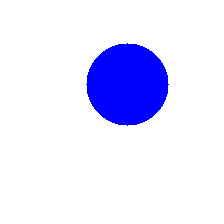

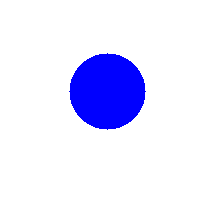

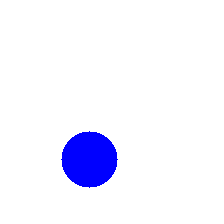

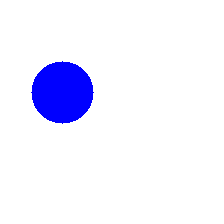

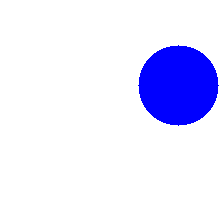

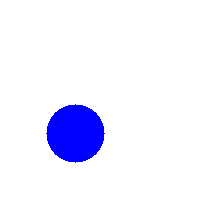

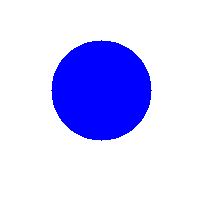

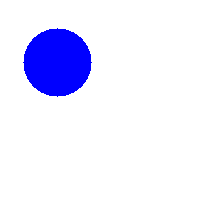

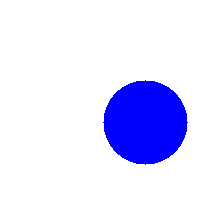

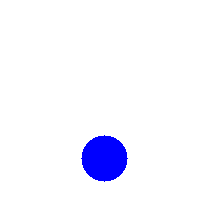

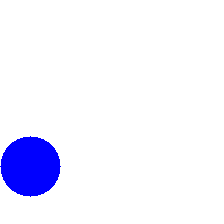

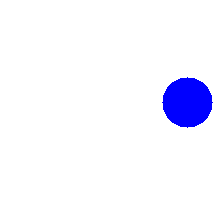

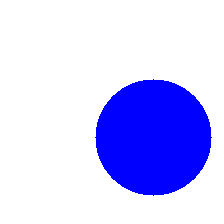

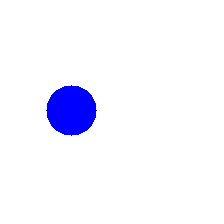

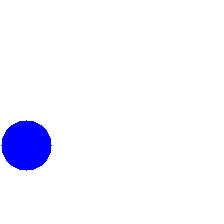

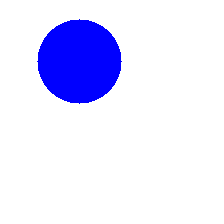

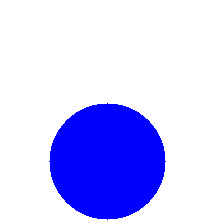

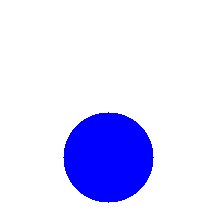

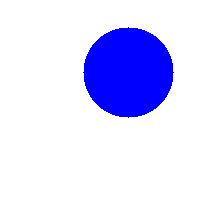

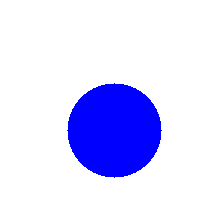

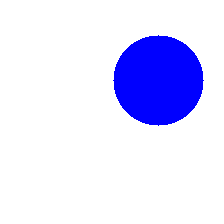

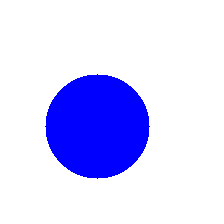

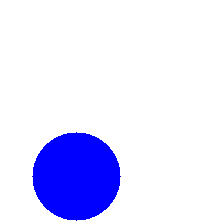

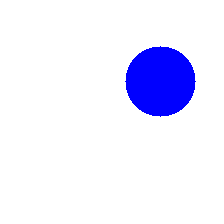

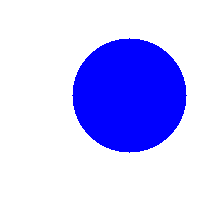

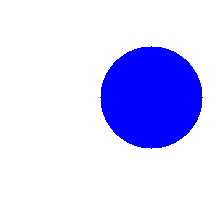

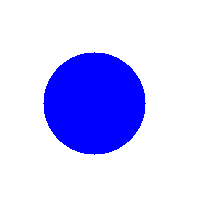

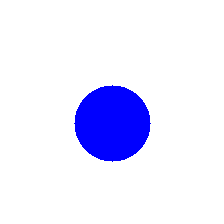

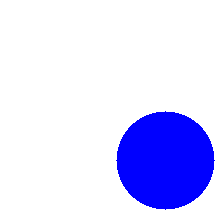

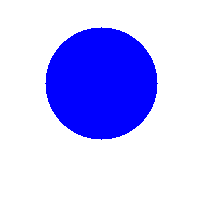

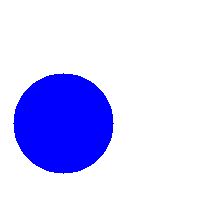

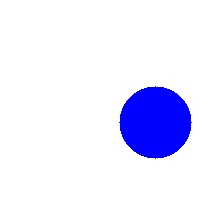

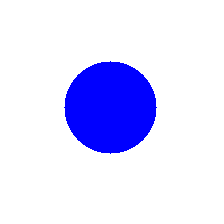

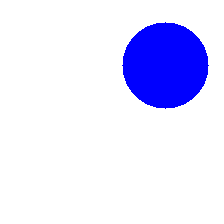

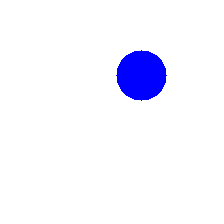

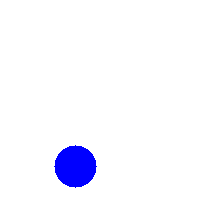

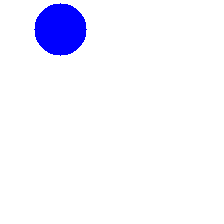

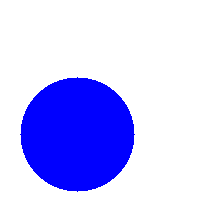

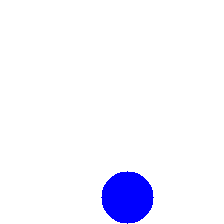

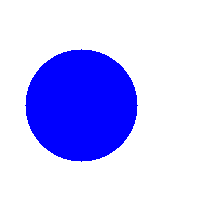

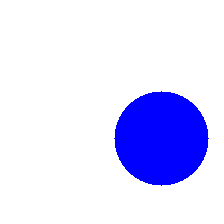

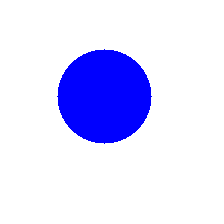

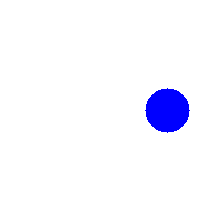

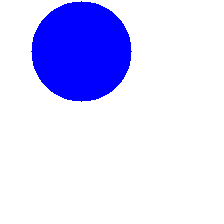

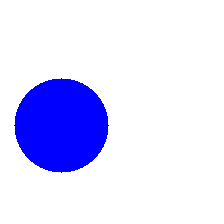

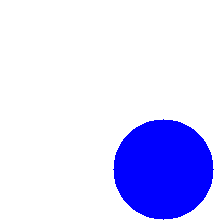

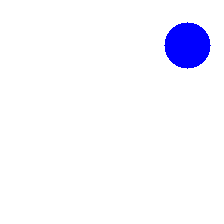

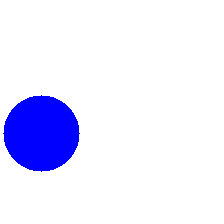

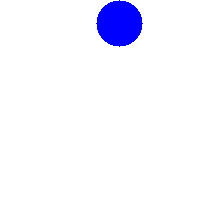

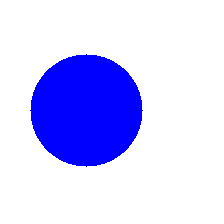

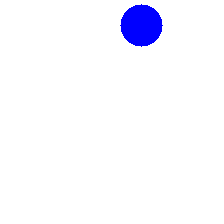

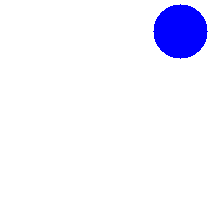

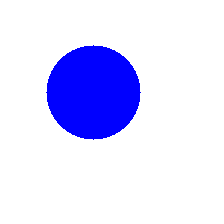

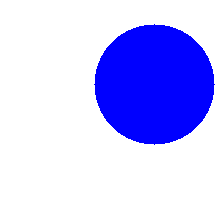

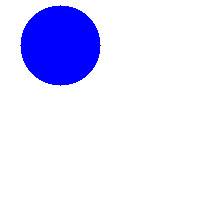

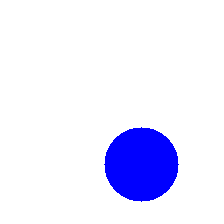

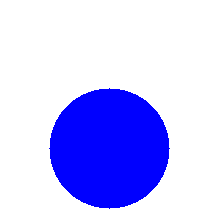

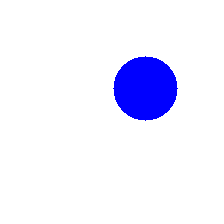

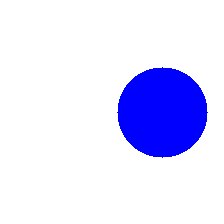

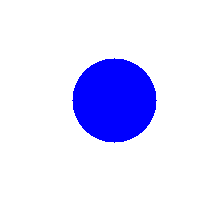

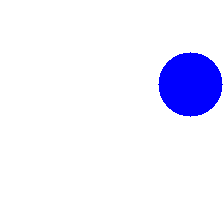

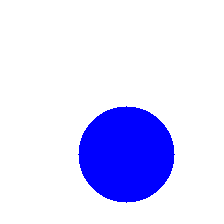

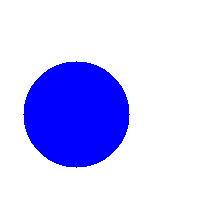

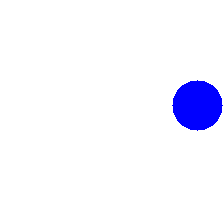

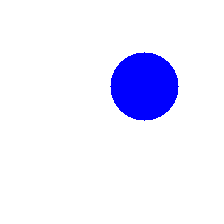

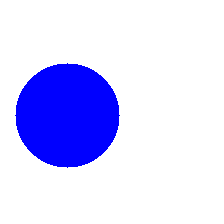

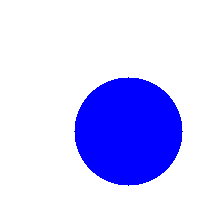

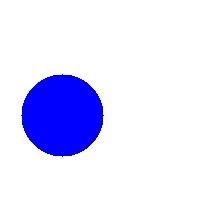

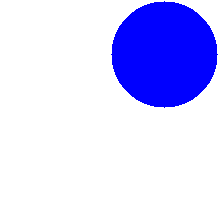

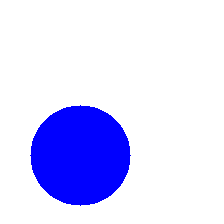

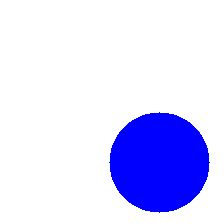

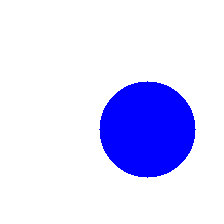

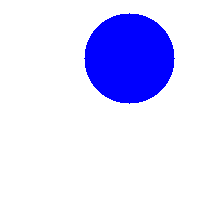

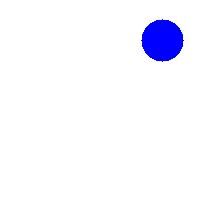

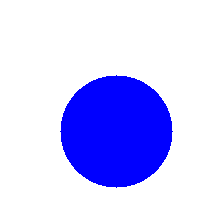

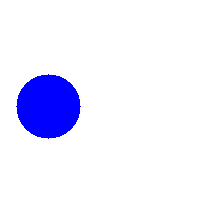

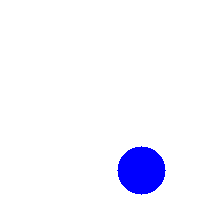

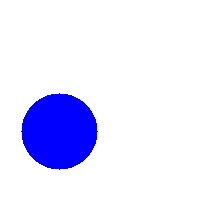

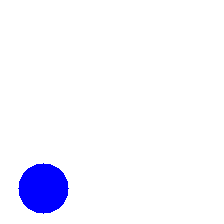

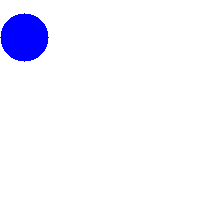

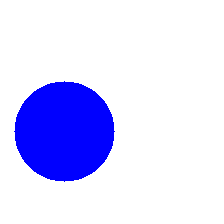

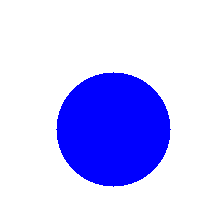

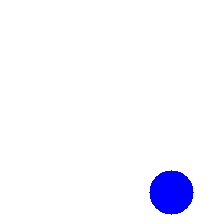

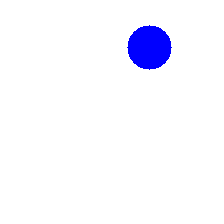

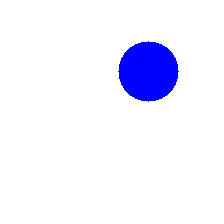

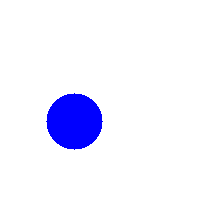

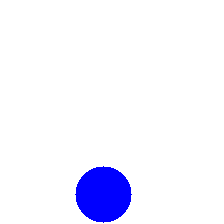

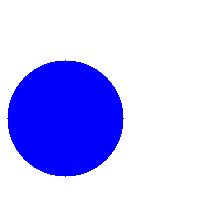

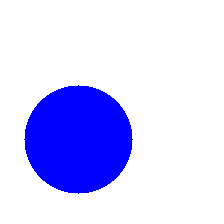

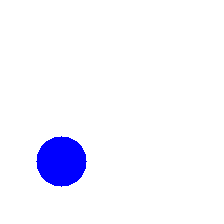

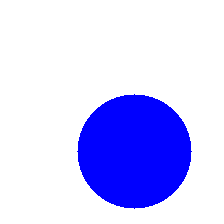

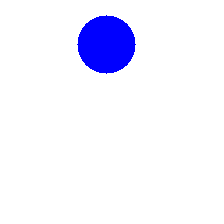

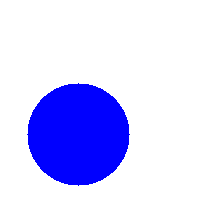

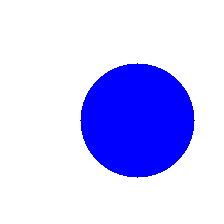

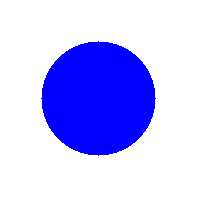

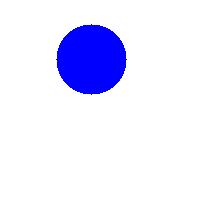

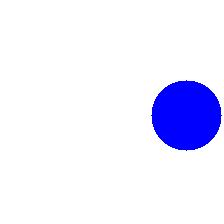

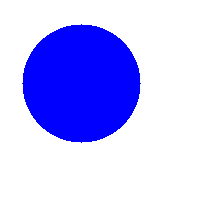

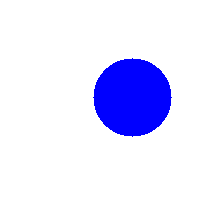

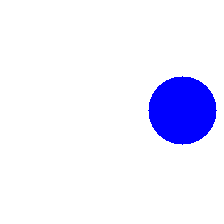

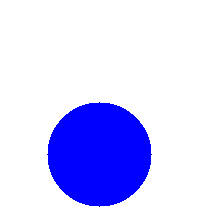

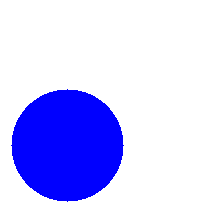

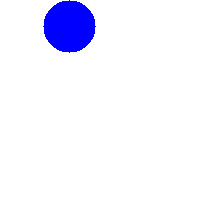

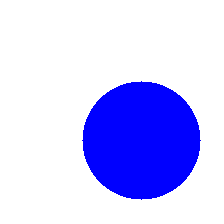

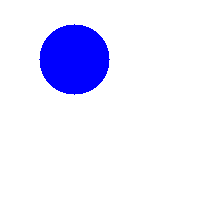

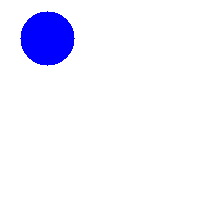

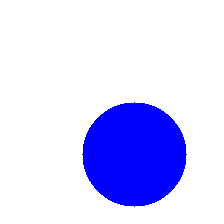

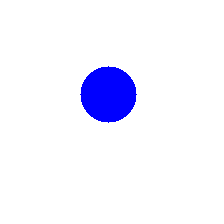

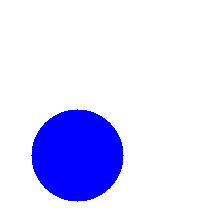

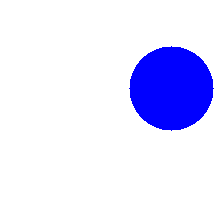

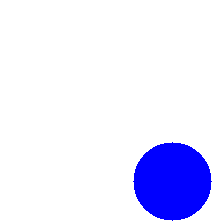

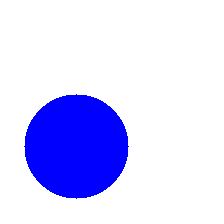

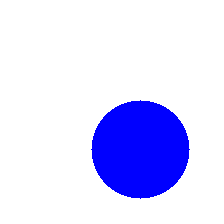

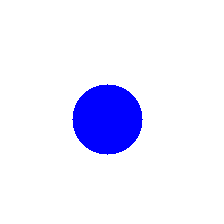

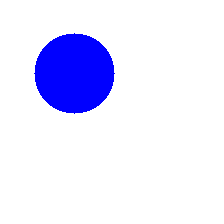

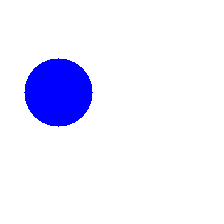

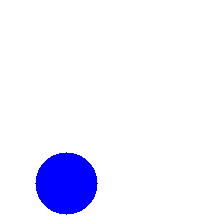

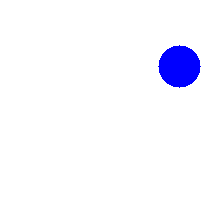

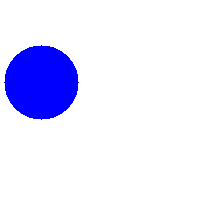

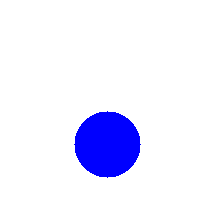

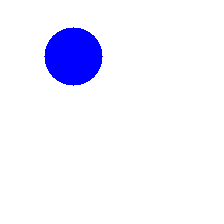

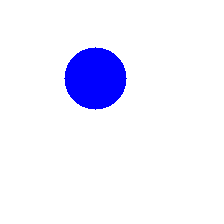

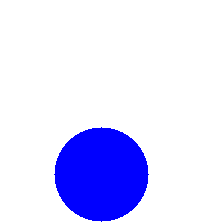

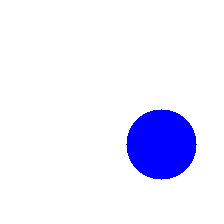

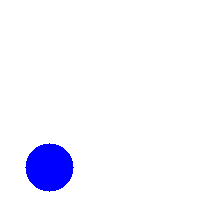

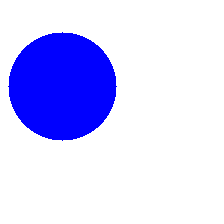

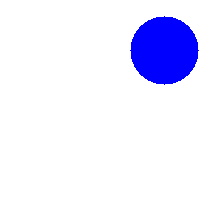

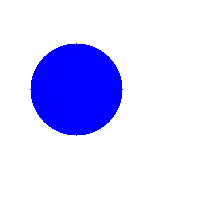

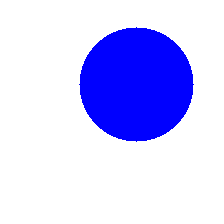

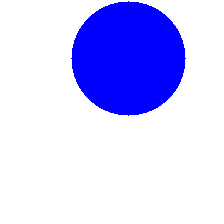

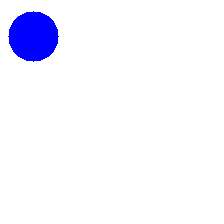

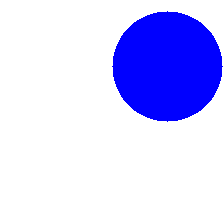

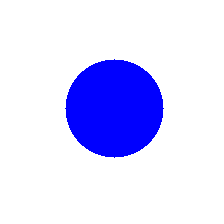

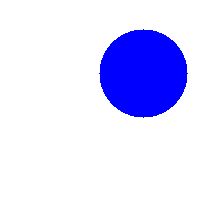

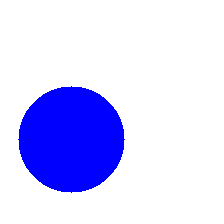

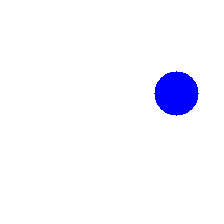

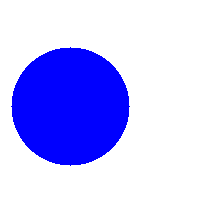

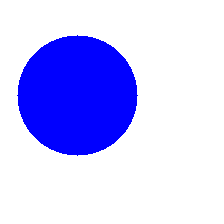

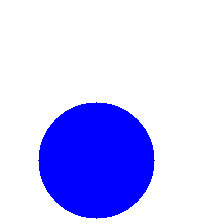

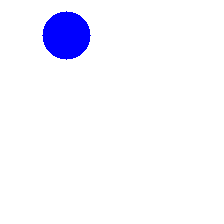

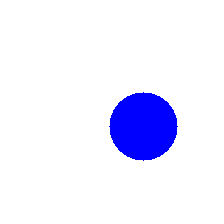

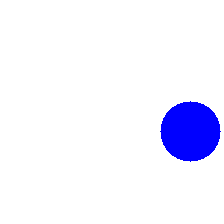

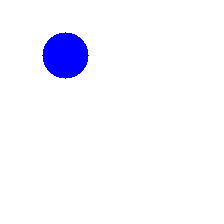

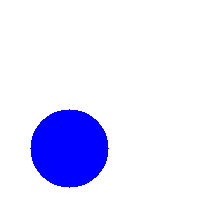

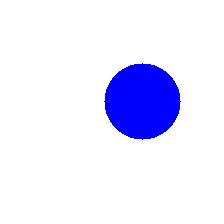

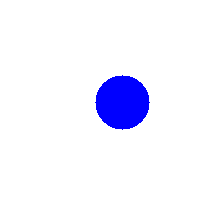

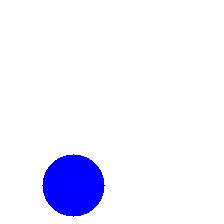

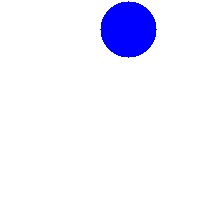

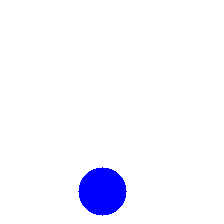

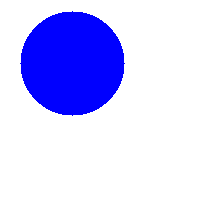

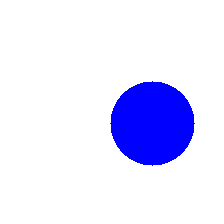

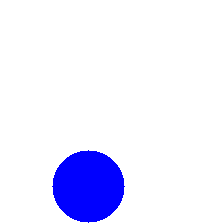

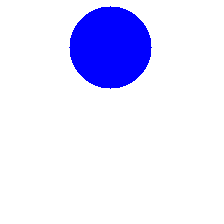

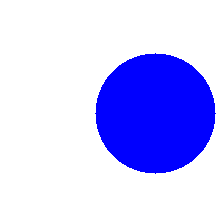

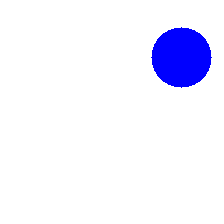

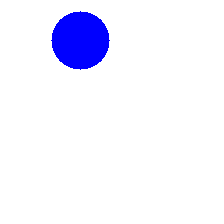

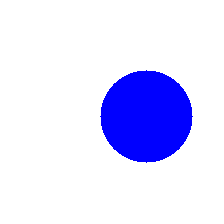

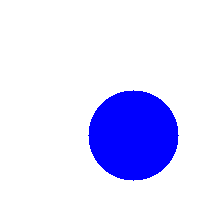

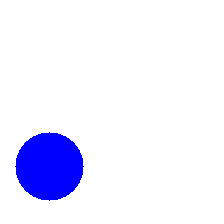

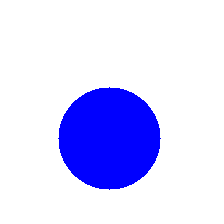

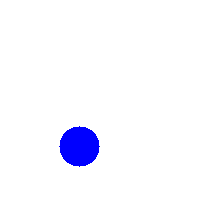

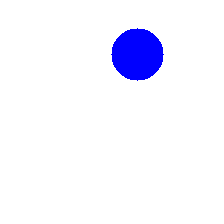

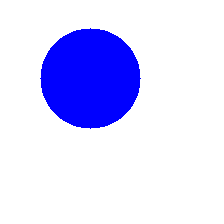

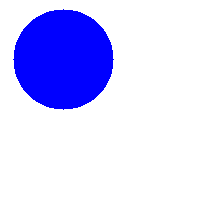

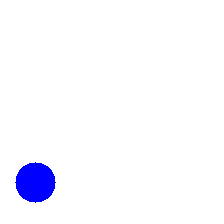

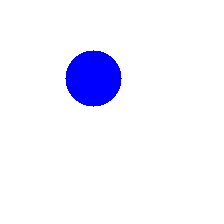

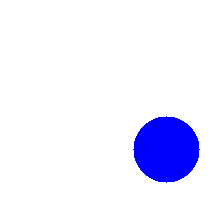

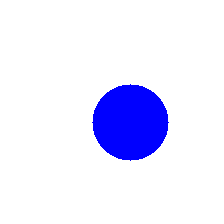

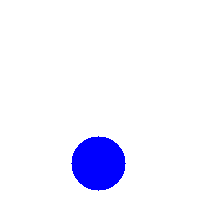

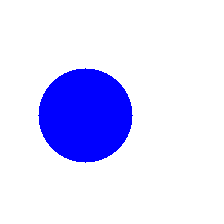

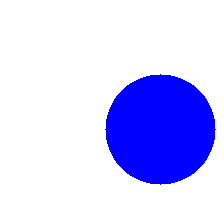

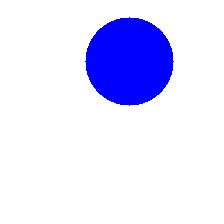

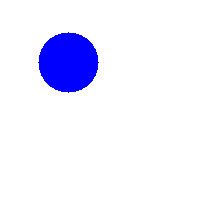

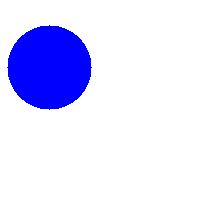

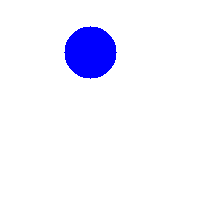

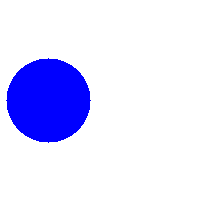

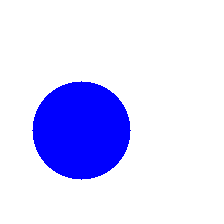

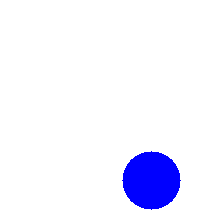

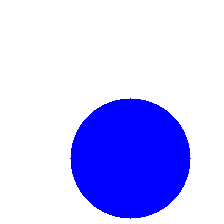

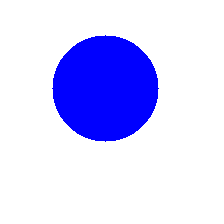

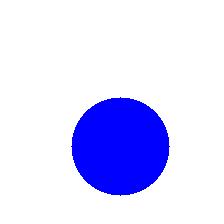

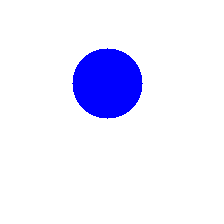

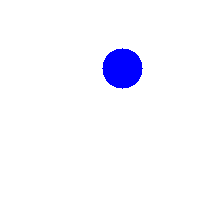

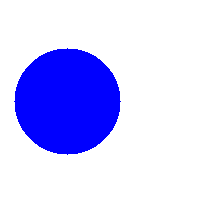

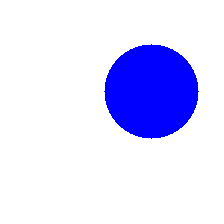

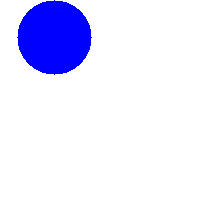

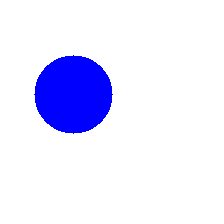

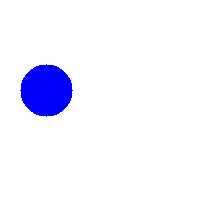

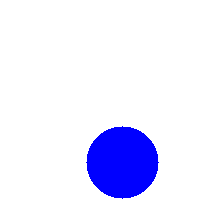

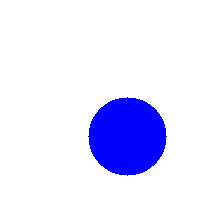

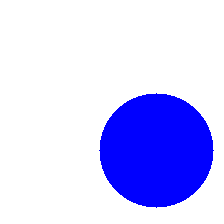

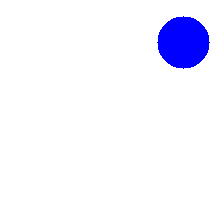

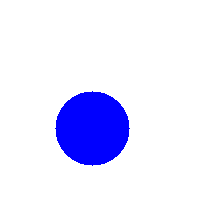

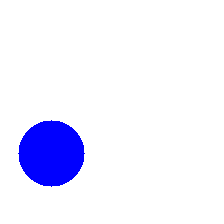

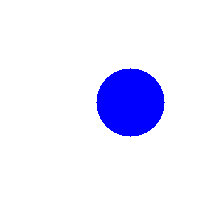

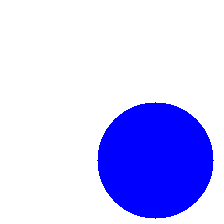

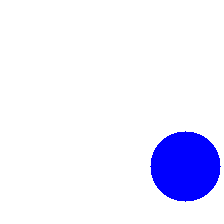

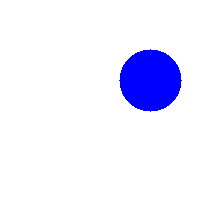

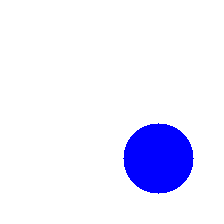

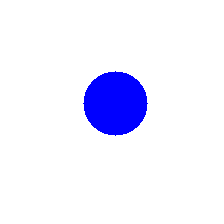

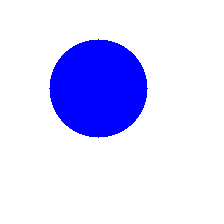

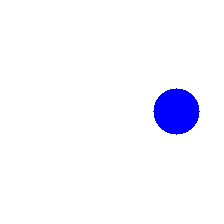

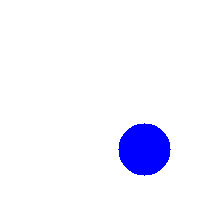

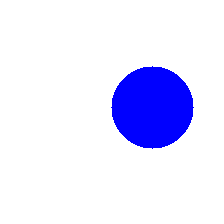

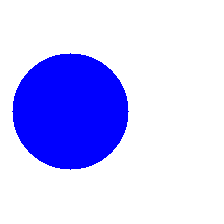

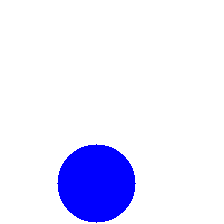

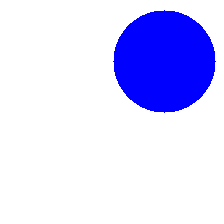

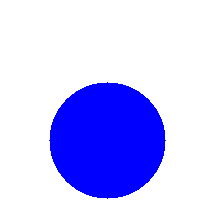

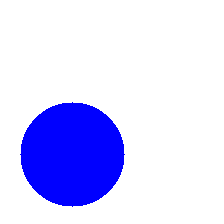

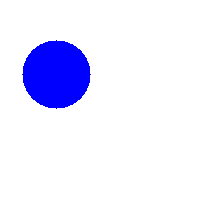

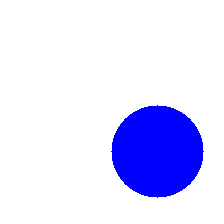

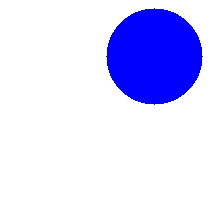

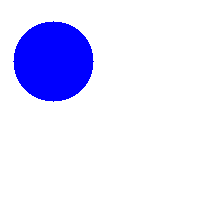

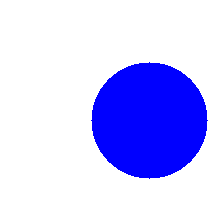

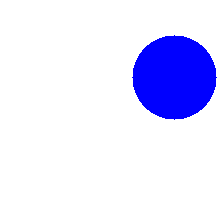

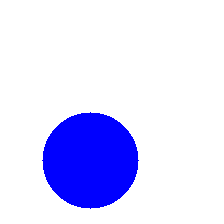

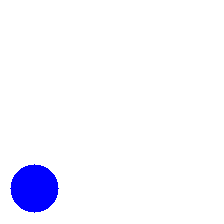

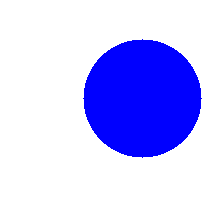

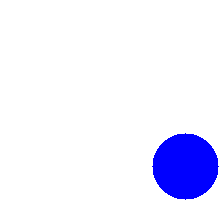

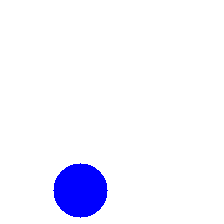

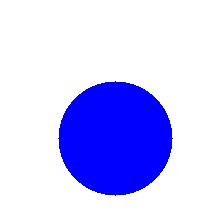

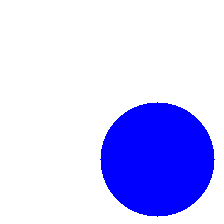

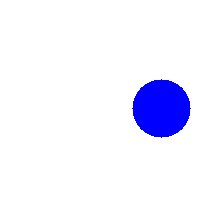

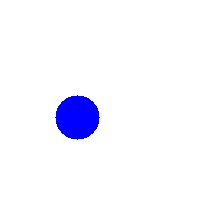

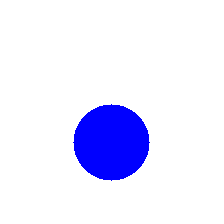

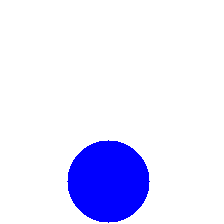

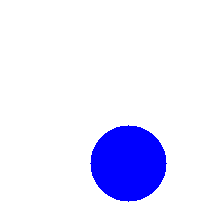

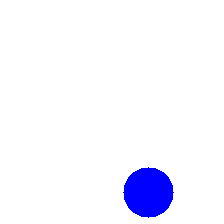

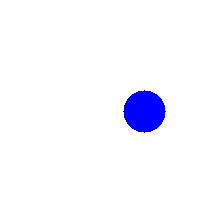

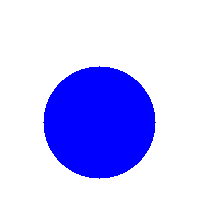

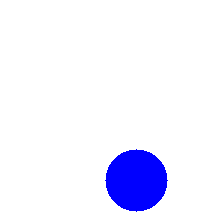

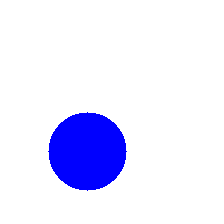

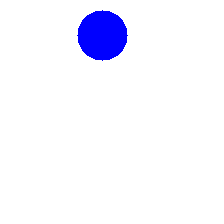

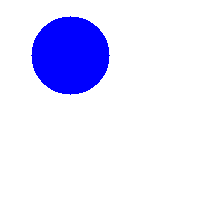

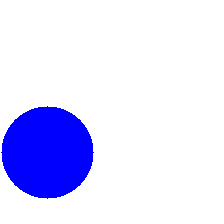

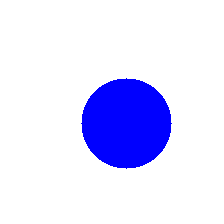

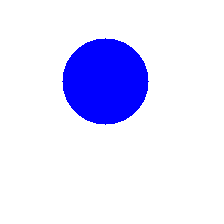

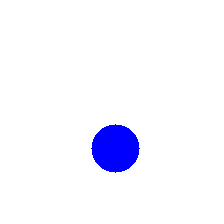

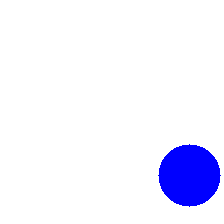

(500, 224, 224, 3)

In [ ]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import random
# Function to generate a random circle center that doesn't touch the image boundary
def generate_center(img_shape, circle_radius):
    img_height, img_width = img_shape[:2]
    # Ensure the circle stays away from image boundaries
    center_X = np.random.randint(circle_radius, img_width - circle_radius)
    center_Y = np.random.randint(circle_radius, img_height - circle_radius)
    return center_X, center_Y

# Create a directory to save the images
#os.makedirs("circle_images", exist_ok=True)

# Fixed circle radius


imgs_list =[]
img_center=[]
# Generate 500 images
num_images = 500
for i in range(num_images):

    # Generate a random image with white background
    img = np.ones((224, 224, 3), dtype=np.uint8) * 255  # Image size is 224x224

    # Generate random circle properties
    circle_radius = random.randint(20, 60)
    circle_center = generate_center(img.shape, circle_radius)
    circle_color = (255, 0, 0)  # Blue color

    # Draw the circle on the image
    cv2.circle(img, circle_center, circle_radius, circle_color, -1)

    # Draw a black dot at the circle's center
    #cv2.circle(img, circle_center, 3, (0, 0, 0), -1)

    # Save the image with a corresponding title
    image_title = f"image_#{i+1}"
    #cv2.putText(img, image_title, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
    #cv2.imwrite(f"circle_images/{image_title}.jpg", img)

    # Display the image
    cv2_imshow(img)
    img_center.append(circle_center)
    imgs_list.append(img)

imgs_np = np.asarray(imgs_list)
imgs_np.shape

Importing neccessary libraries

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import re
import matplotlib.pyplot as plt

CNN modelcode and compilation

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, BatchNormalization,MaxPooling2D,GlobalAveragePooling2D,Dropout

import keras
from keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from keras.applications import Xception,MobileNet,MobileNetV2

base_model = keras.applications.MobileNetV2(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False,
)  # Do not include the ImageNet classifier at the top.

# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(224, 224, 3))


# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.1)(x)  # Regularize with dropout
x = keras.layers.Dense(10,activation="relu")(x)
outputs = keras.layers.Dense(2)(x)
model = keras.Model(inputs, outputs)

model.summary(show_trainable=True)


# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mean_squared_error',
              metrics=['mean_squared_error'])




9406464/9406464 [==============================] - 0s 0us/step
Model: "model"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         Y          
                                                                            
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   N          
 tional)                                                                    
                                                                            
 global_average_pooling2d (  (None, 1280)              0         Y          
 GlobalAveragePooling2D)                                                    
                                                                            
 dropout (Dropout)           (None, 1280)              0         Y          
                                                                           

In [ ]:
import tensorflow as tf

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',      # Metric to monitor
    patience=15,             # Number of epochs with no improvement to wait before stopping
    restore_best_weights=True # Restore the model weights from the epoch with the best value of the monitored metric
)

batch_size = 36

# Train the model with early stopping
history = model.fit(
    X, y,
    epochs=350,
    batch_size=batch_size,
    steps_per_epoch=len(X) // batch_size,
    validation_split=0.1,
    callbacks=[early_stopping]  #early stopping callback
)


Epoch 1/350
13/13 [==============================] - 12s 315ms/step - loss: 9513.0303 - mean_squared_error: 9513.0303 - val_loss: 6453.3486 - val_mean_squared_error: 6453.3486
Epoch 2/350
13/13 [==============================] - 1s 69ms/step - loss: 3886.7375 - mean_squared_error: 3886.7375 - val_loss: 2923.5137 - val_mean_squared_error: 2923.5137
Epoch 3/350
13/13 [==============================] - 1s 69ms/step - loss: 2373.3052 - mean_squared_error: 2373.3052 - val_loss: 2170.5684 - val_mean_squared_error: 2170.5684
Epoch 4/350
13/13 [==============================] - 1s 66ms/step - loss: 2084.4875 - mean_squared_error: 2084.4873 - val_loss: 1948.6935 - val_mean_squared_error: 1948.6935
Epoch 5/350
13/13 [==============================] - 1s 59ms/step - loss: 1966.7179 - mean_squared_error: 1966.7179 - val_loss: 1792.8276 - val_mean_squared_error: 1792.8276
Epoch 6/350
13/13 [==============================] - 1s 58ms/step - loss: 1846.2106 - mean_squared_error: 1846.2106 - val_loss: 

In [ ]:
batch_size = 36

model.fit(
    X,y,
    epochs=350,
    batch_size = batch_size,
    steps_per_epoch = len(X) //  batch_size,
    validation_split=0.1
    )

Epoch 1/350
13/13 [==============================] - 1s 70ms/step - loss: 61.4223 - mean_squared_error: 61.4223 - val_loss: 37.2829 - val_mean_squared_error: 37.2829
Epoch 2/350
13/13 [==============================] - 1s 63ms/step - loss: 66.9754 - mean_squared_error: 66.9754 - val_loss: 36.4502 - val_mean_squared_error: 36.4502
Epoch 3/350
13/13 [==============================] - 1s 65ms/step - loss: 64.0132 - mean_squared_error: 64.0132 - val_loss: 45.4535 - val_mean_squared_error: 45.4535
Epoch 4/350
13/13 [==============================] - 1s 60ms/step - loss: 64.4145 - mean_squared_error: 64.4145 - val_loss: 39.2140 - val_mean_squared_error: 39.2140
Epoch 5/350
13/13 [==============================] - 1s 54ms/step - loss: 71.0472 - mean_squared_error: 71.0472 - val_loss: 36.0957 - val_mean_squared_error: 36.0957
Epoch 6/350
13/13 [==============================] - 1s 54ms/step - loss: 66.8732 - mean_squared_error: 66.8732 - val_loss: 38.0184 - val_mean_squared_error: 38.0184
Epoc

A graph to visualise the MSE trend for train and validation.

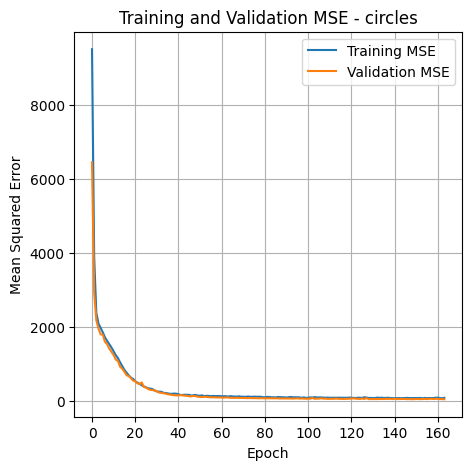

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
# Plot the training and validation MSE
plt.figure(figsize=(5, 5))

# Training MSE
plt.plot(history.history['mean_squared_error'], label='Training MSE')

# Validation MSE
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')

plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation MSE - circles')
plt.legend()
plt.grid(True)
plt.show()

Visualising predicted centre poin on test images

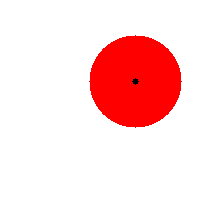

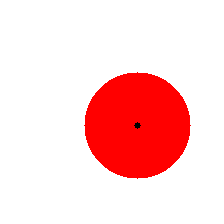

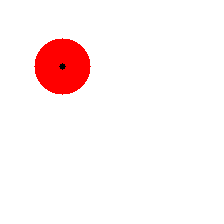

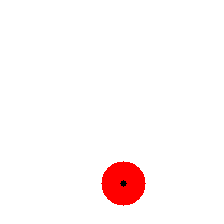

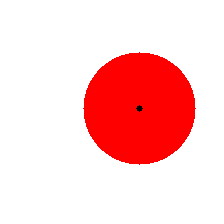

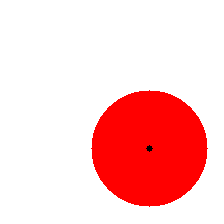

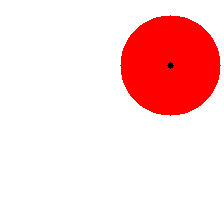

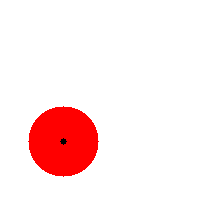

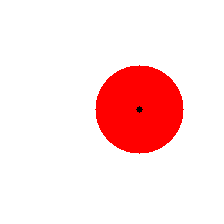

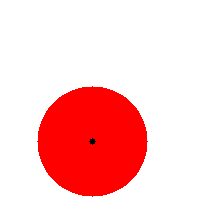

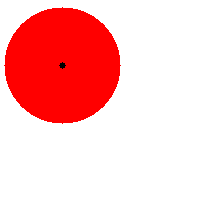

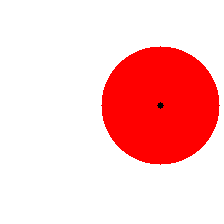

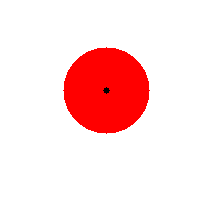

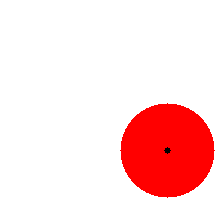

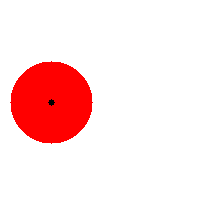

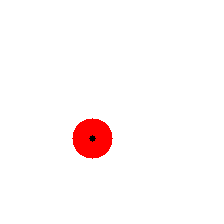

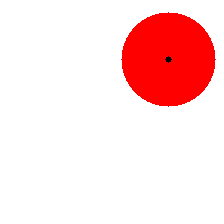

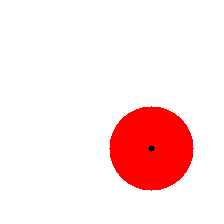

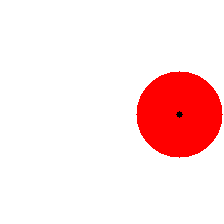

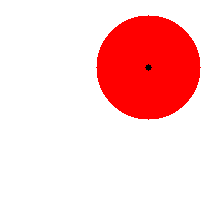

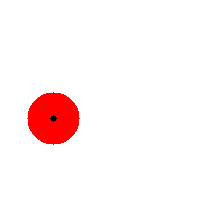

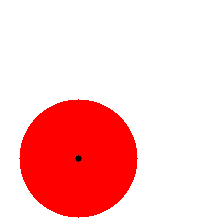

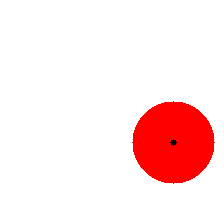

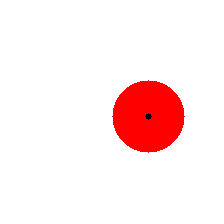

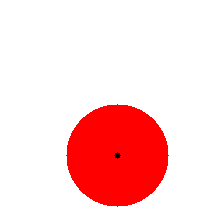

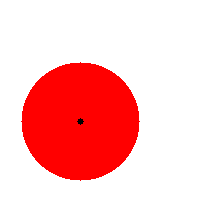

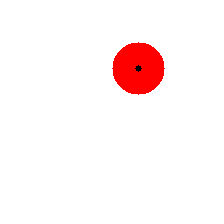

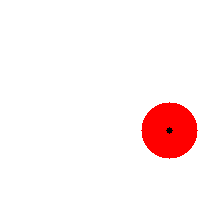

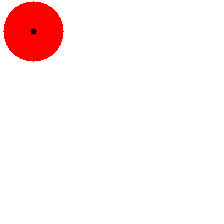

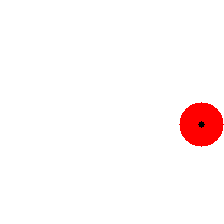

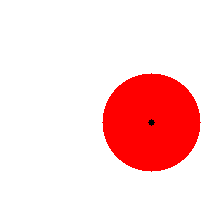

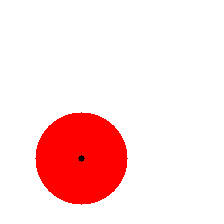

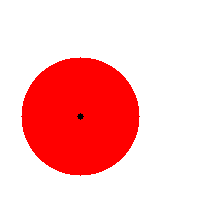

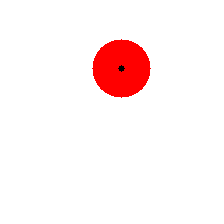

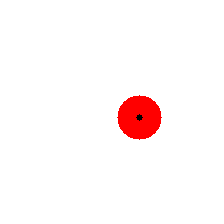

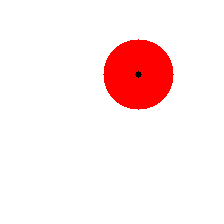

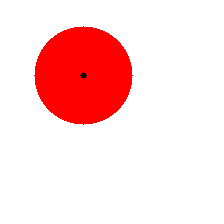

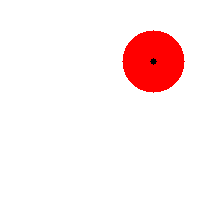

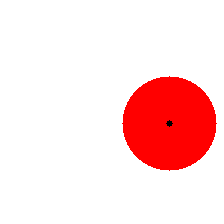

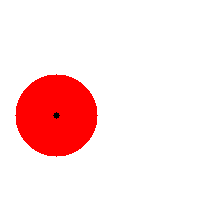

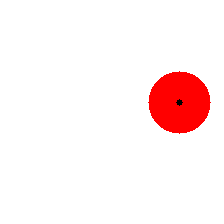

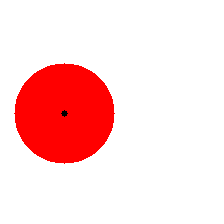

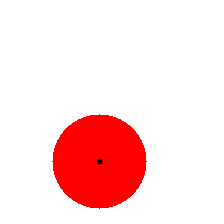

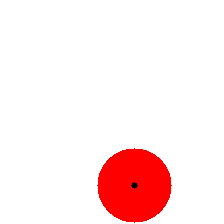

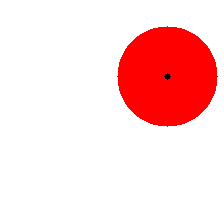

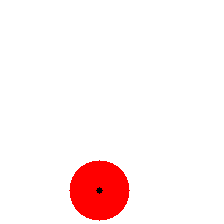

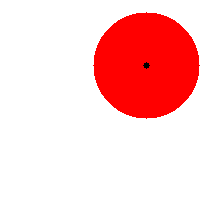

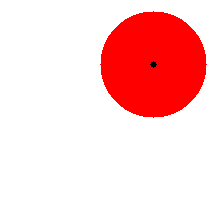

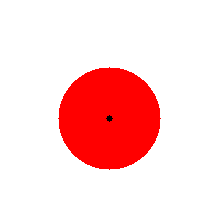

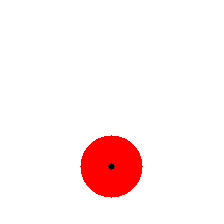

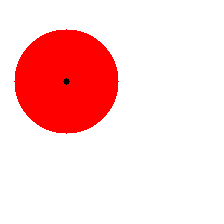

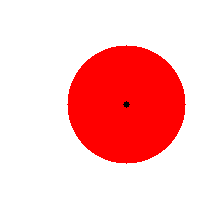

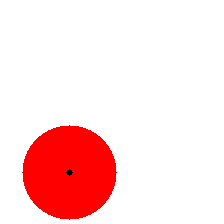

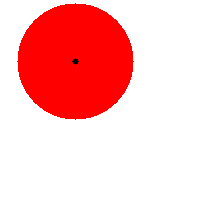

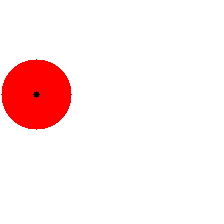

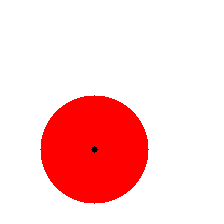

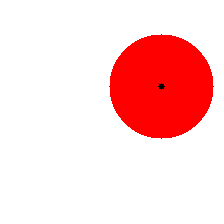

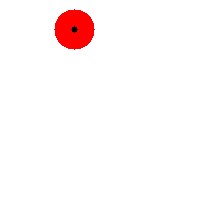

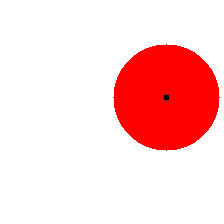

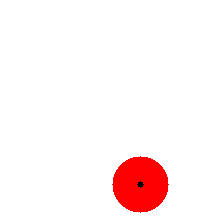

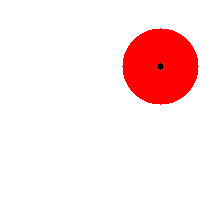

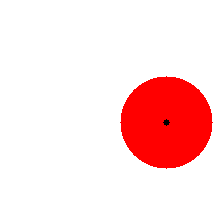

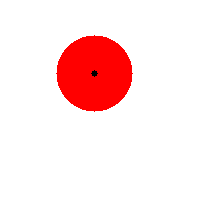

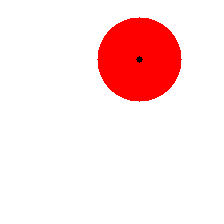

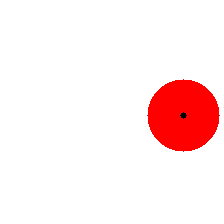

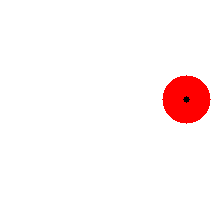

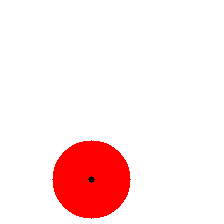

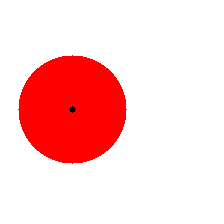

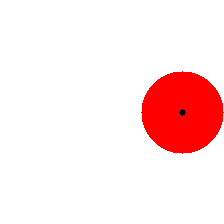

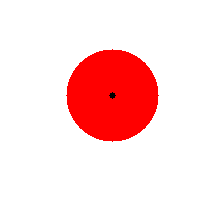

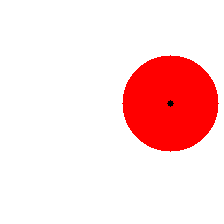

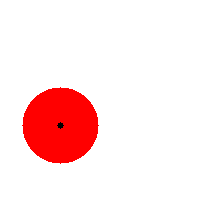

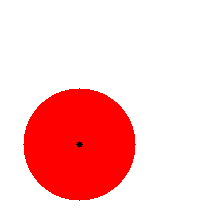

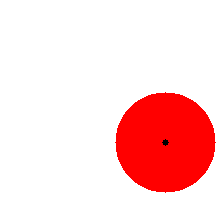

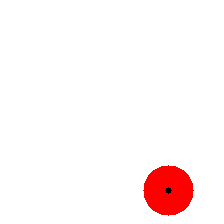

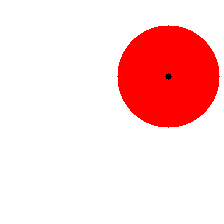

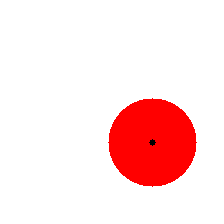

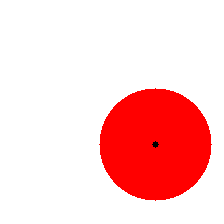

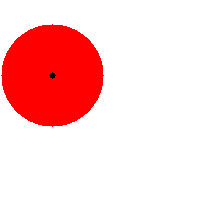

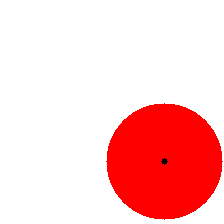

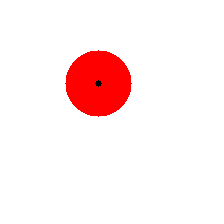

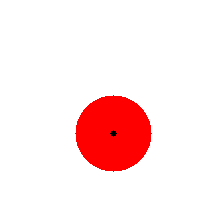

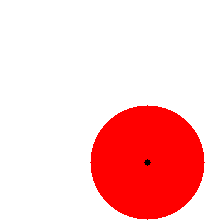

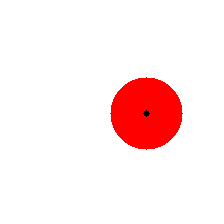

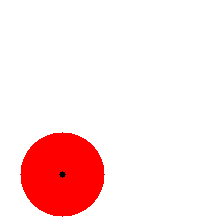

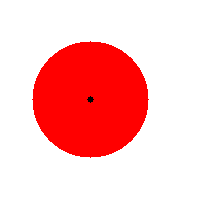

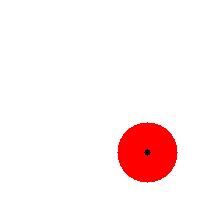

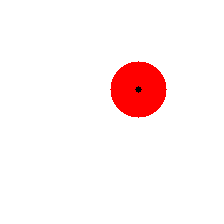

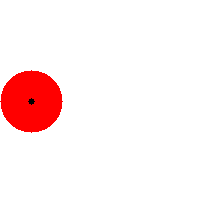

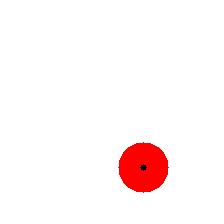

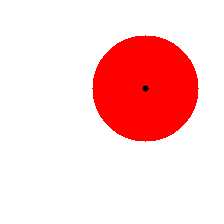

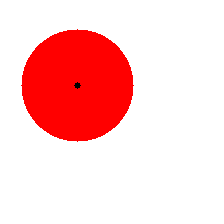

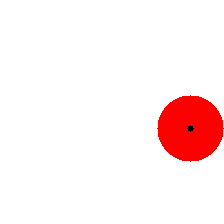

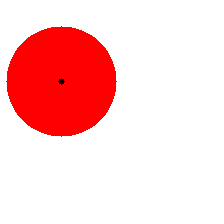

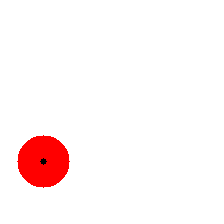

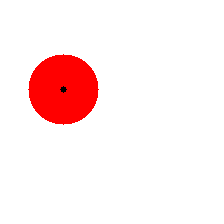

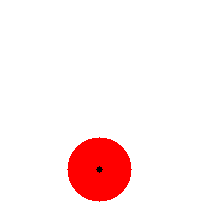

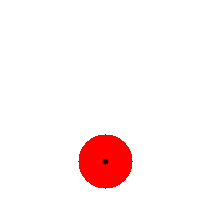

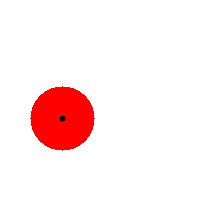

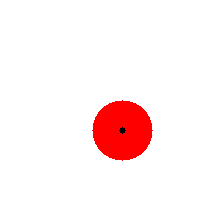

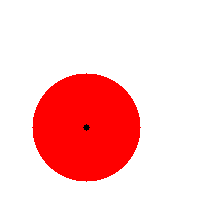

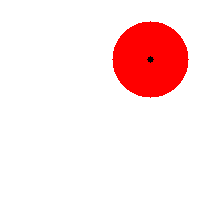

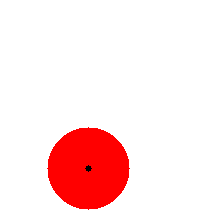

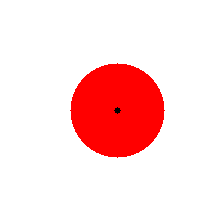

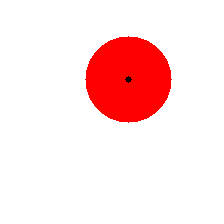

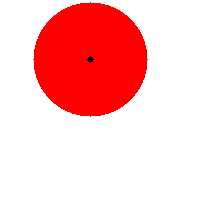

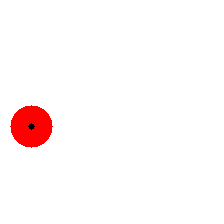

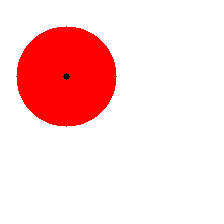

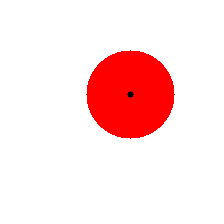

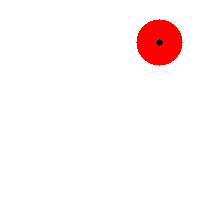

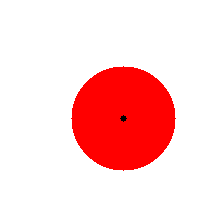

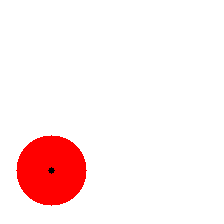

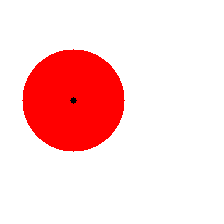

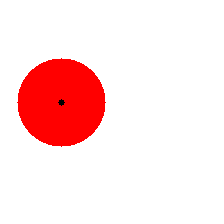

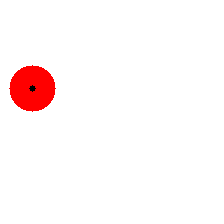

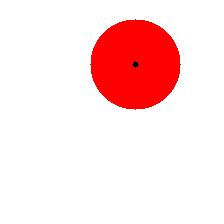

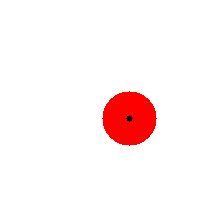

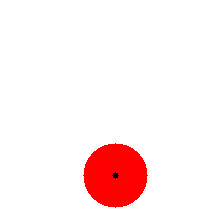

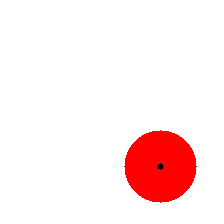

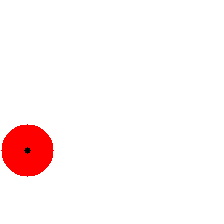

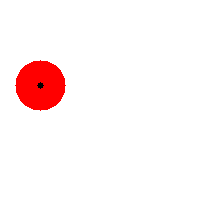

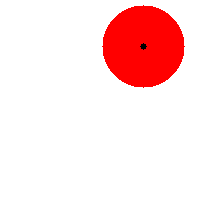

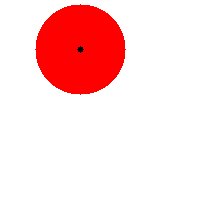

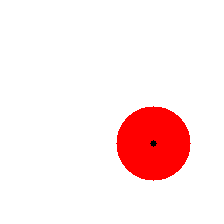

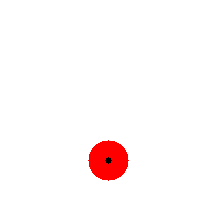

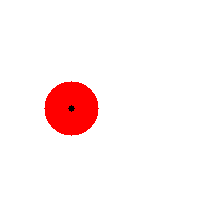

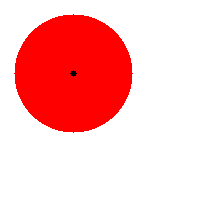

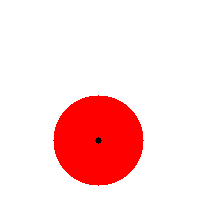

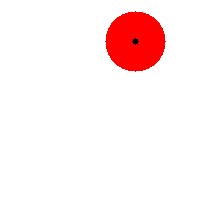

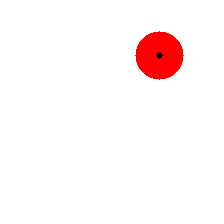

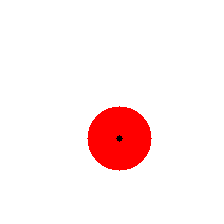

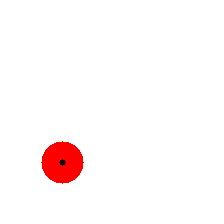

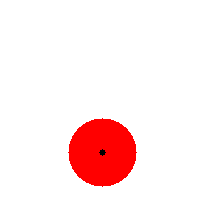

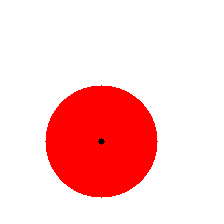

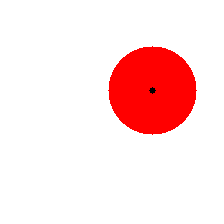

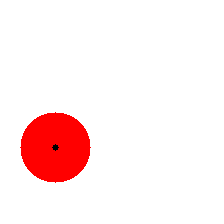

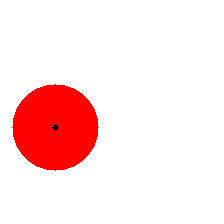

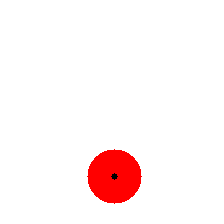

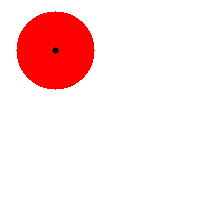

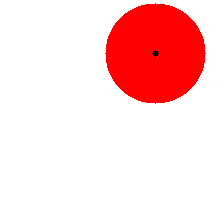

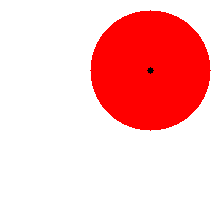

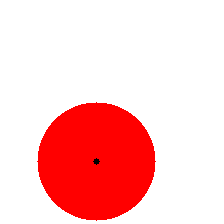

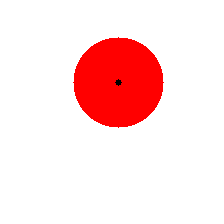

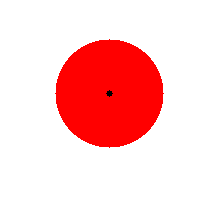

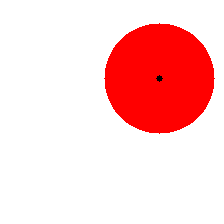

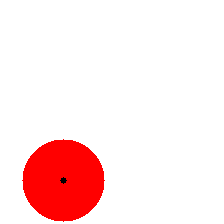

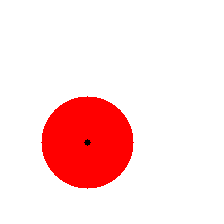

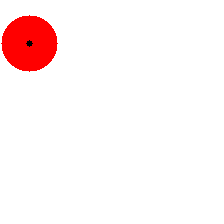

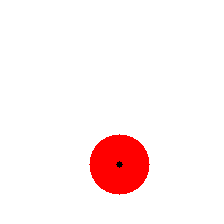

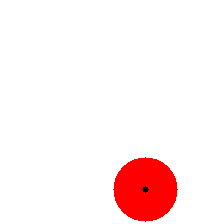

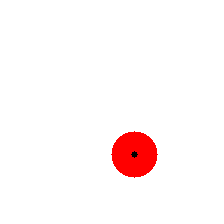

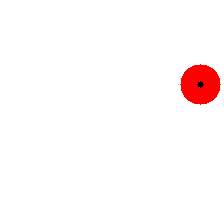

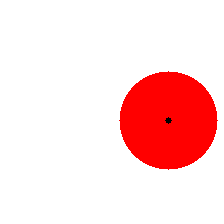

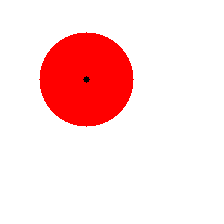

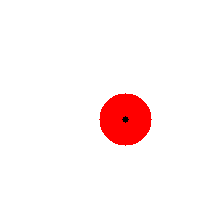

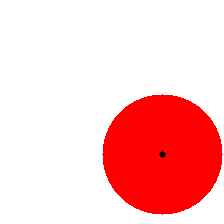

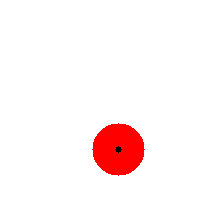

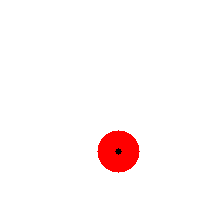

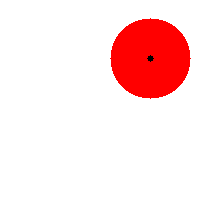

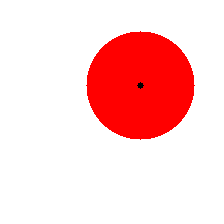

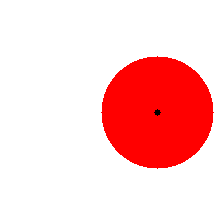

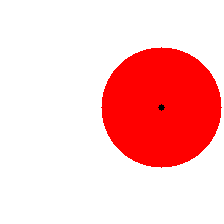

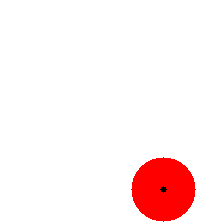

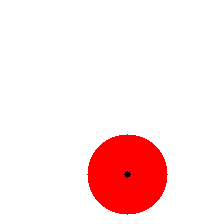

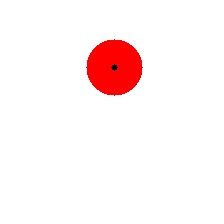

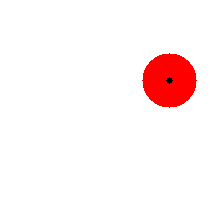

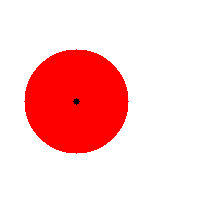

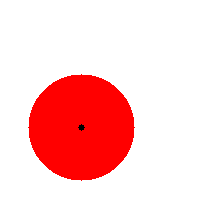

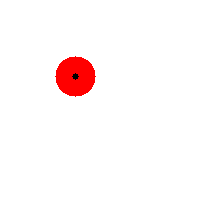

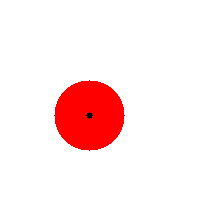

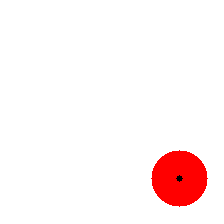

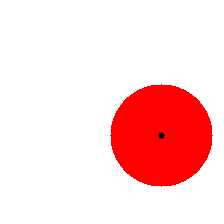

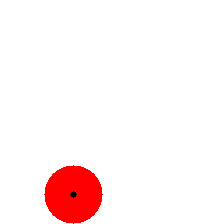

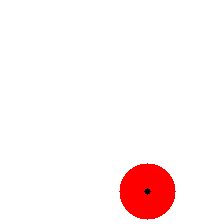

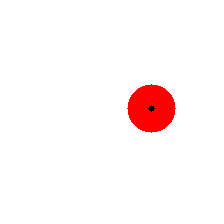

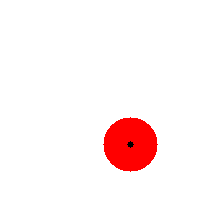

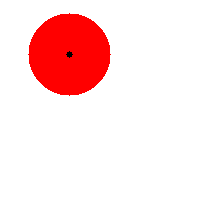

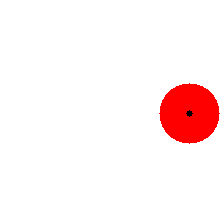

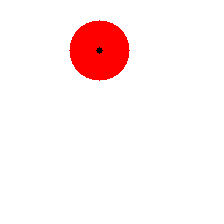

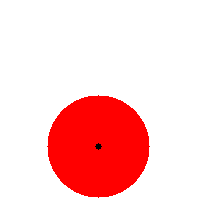

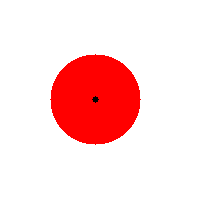

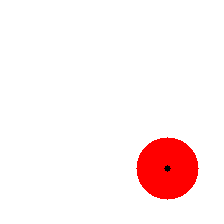

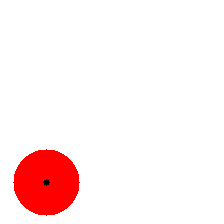

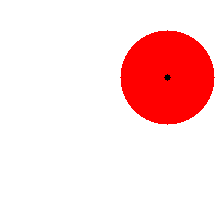

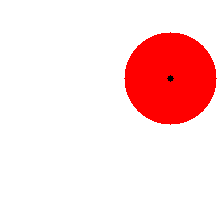

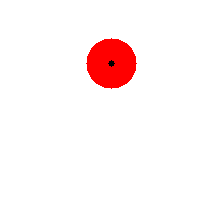

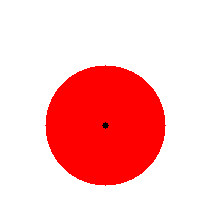

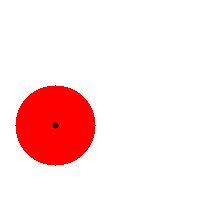

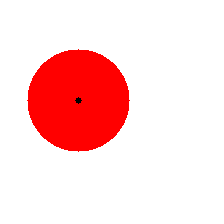

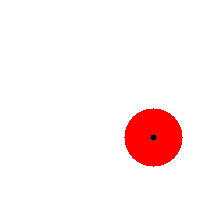

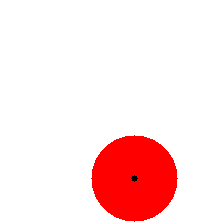

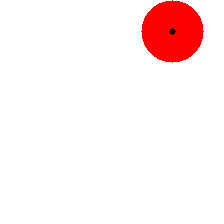

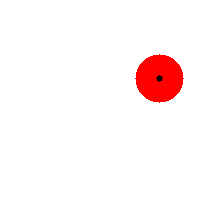

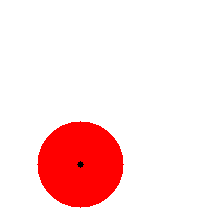

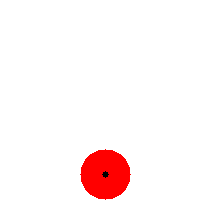

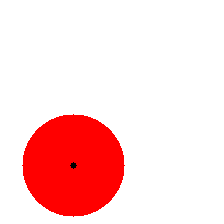

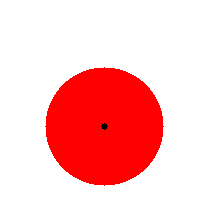

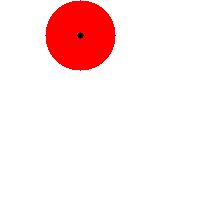

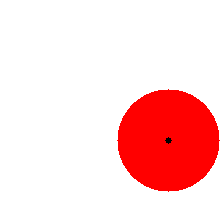

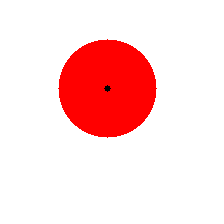

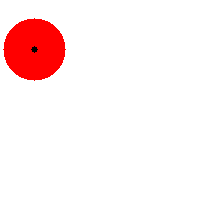

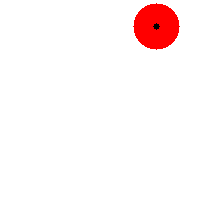

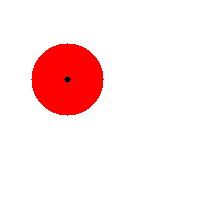

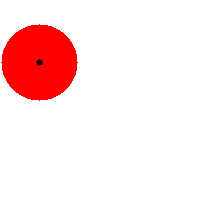

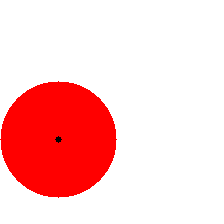

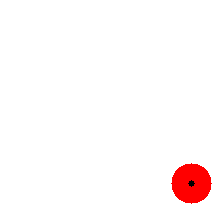

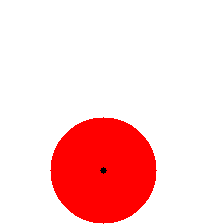

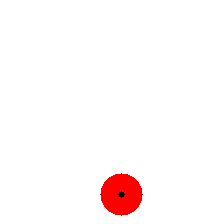

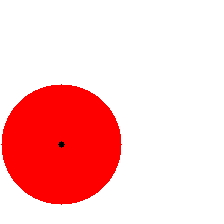

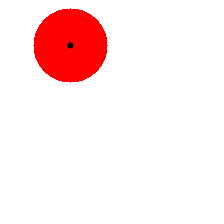

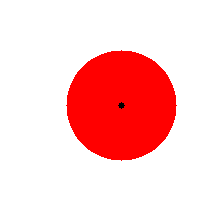

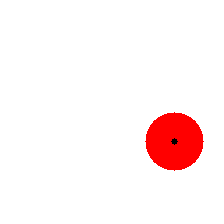

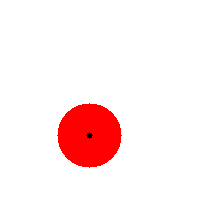

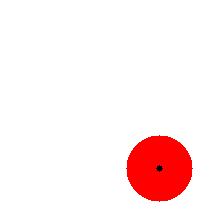

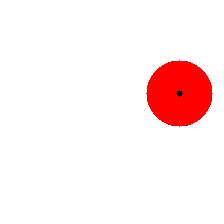

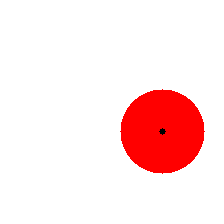

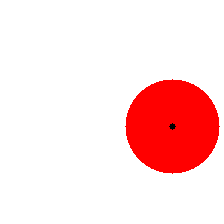

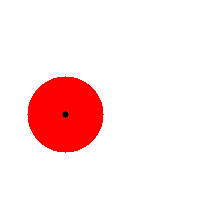

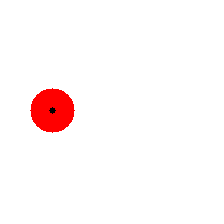

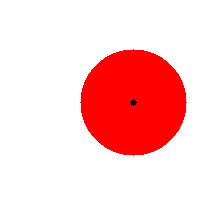

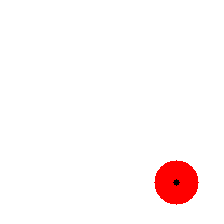

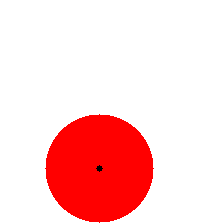

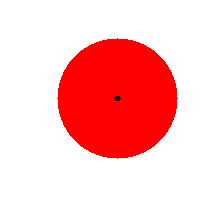

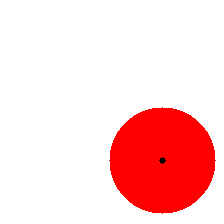

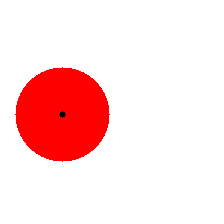

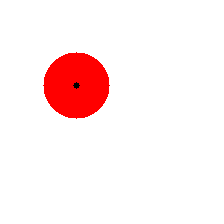

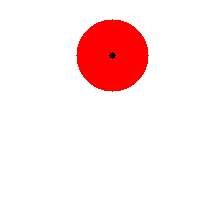

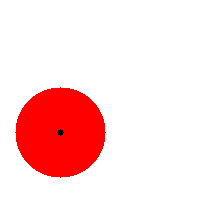

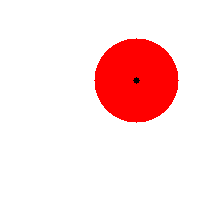

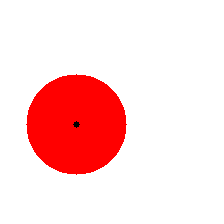

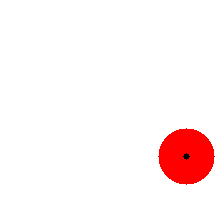

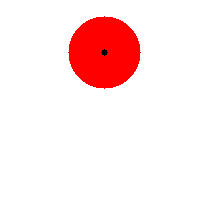

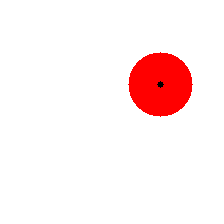

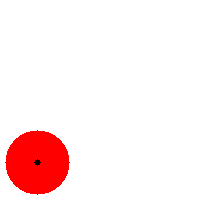

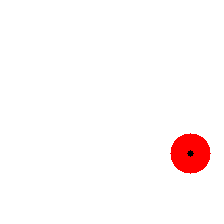

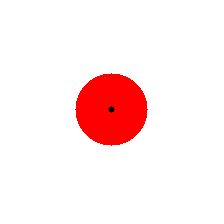

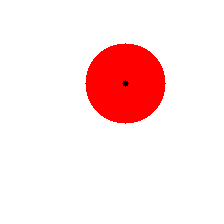

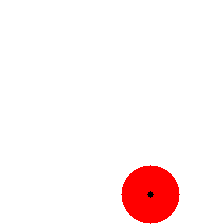

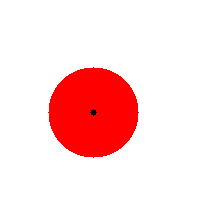

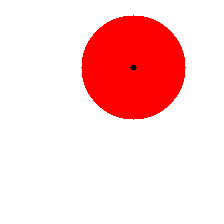

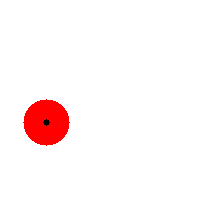

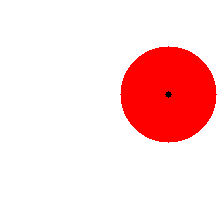

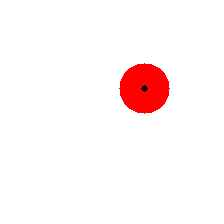

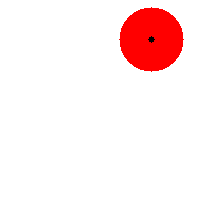

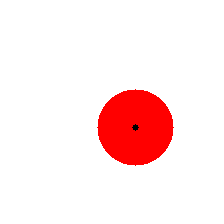

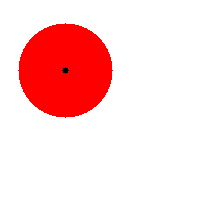

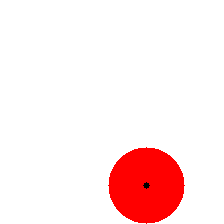

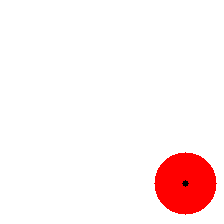

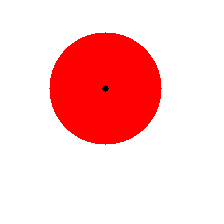

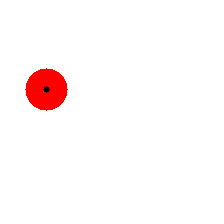

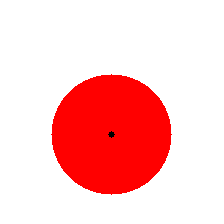

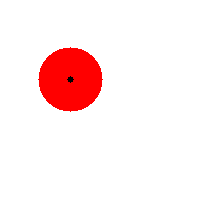

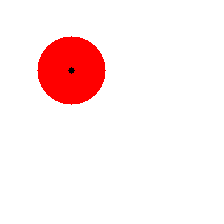

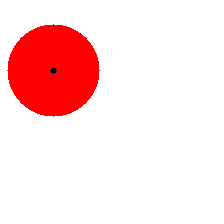

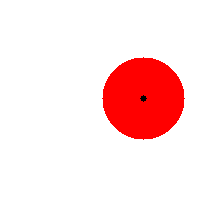

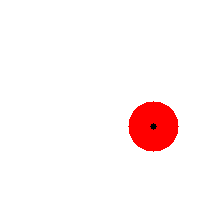

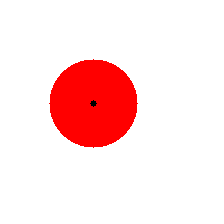

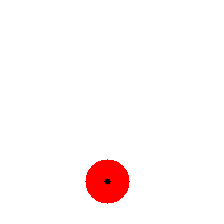

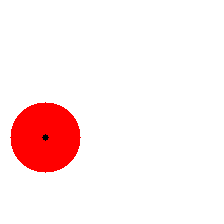

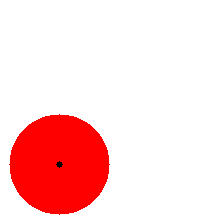

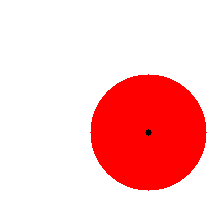

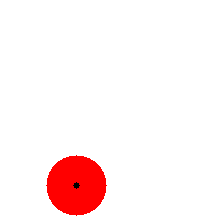

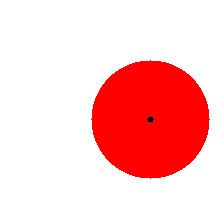

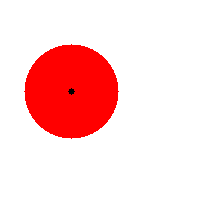

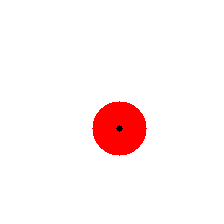

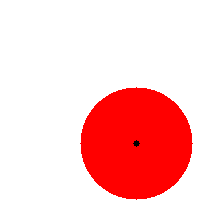

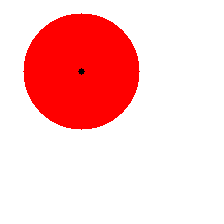

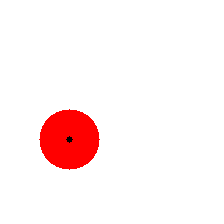

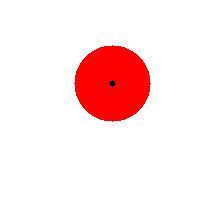

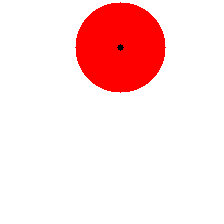

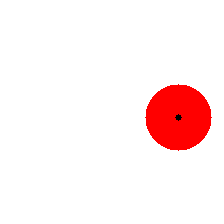

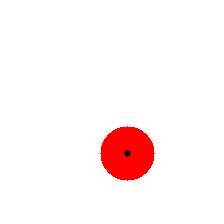

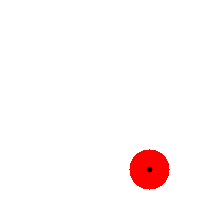

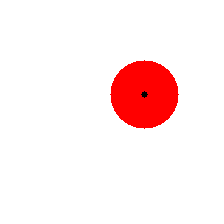

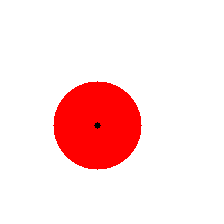

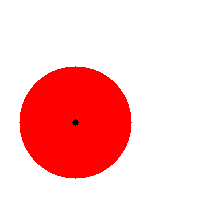

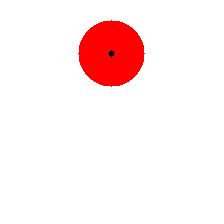

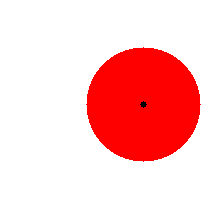

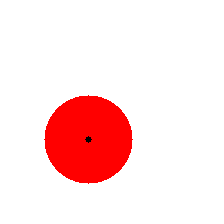

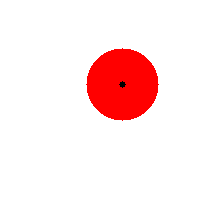

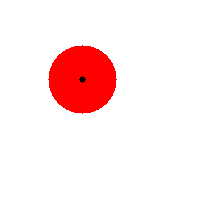

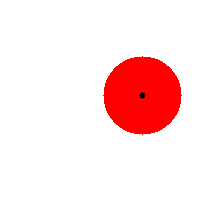

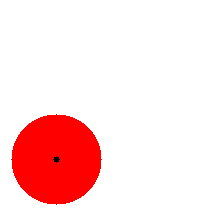

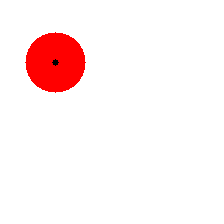

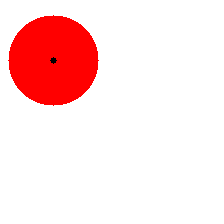

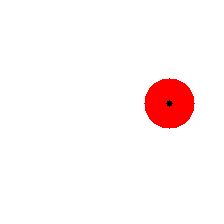

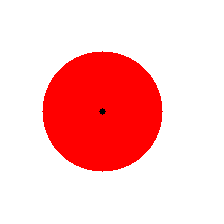

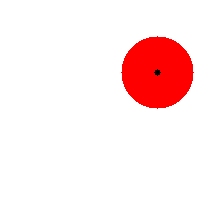

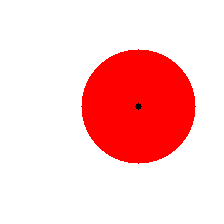

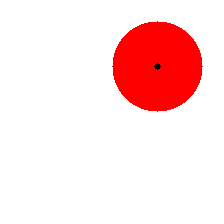

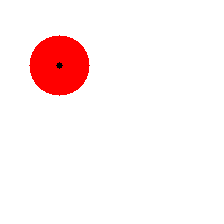

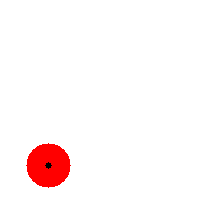

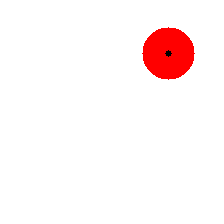

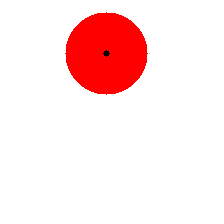

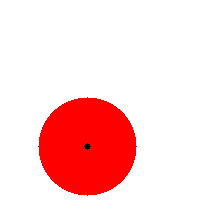

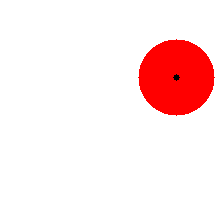

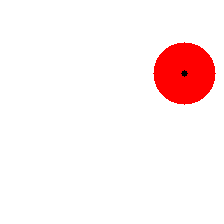

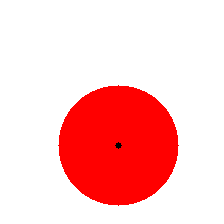

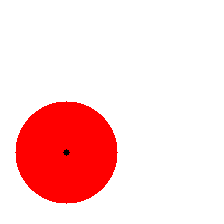

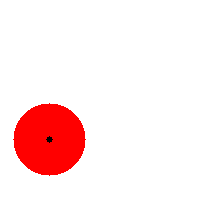

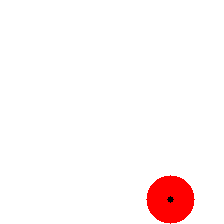

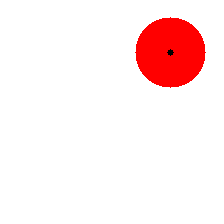

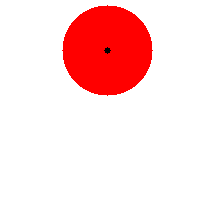

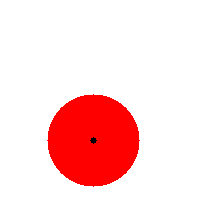

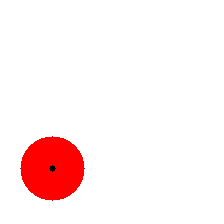

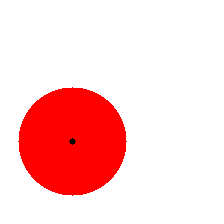

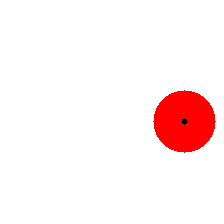

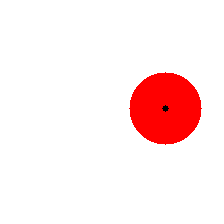

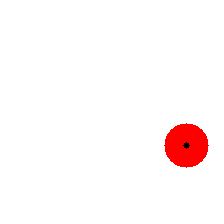

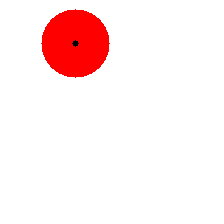

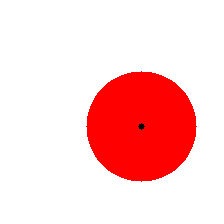

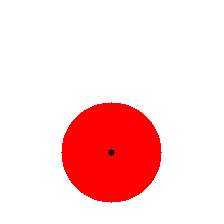

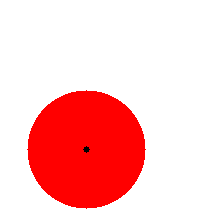

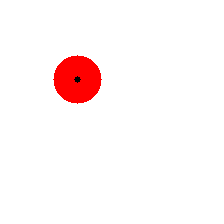

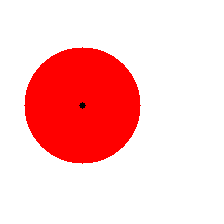

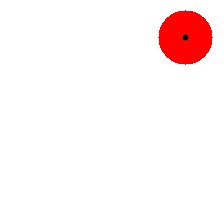

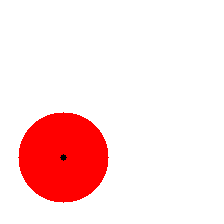

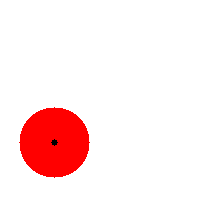

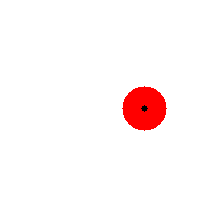

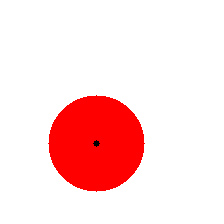

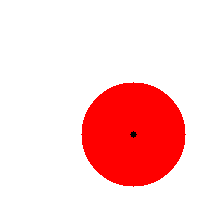

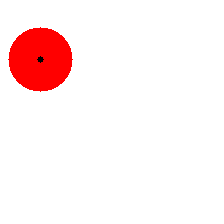

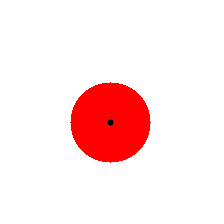

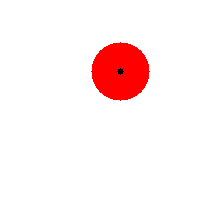

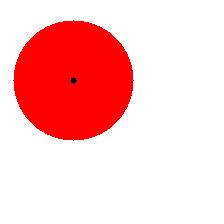

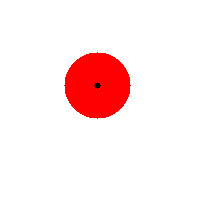

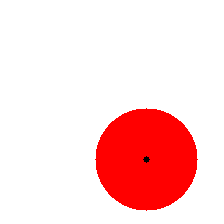

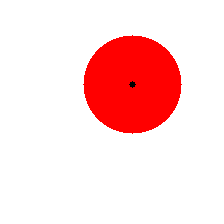

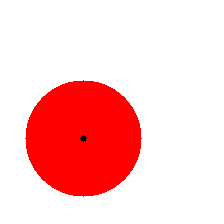

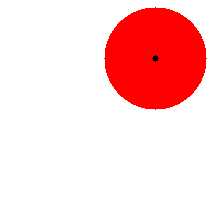

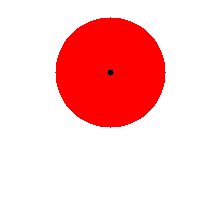

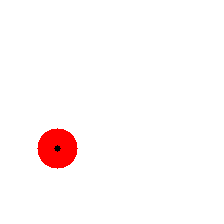

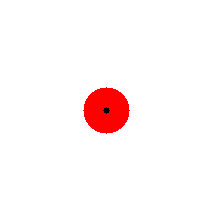

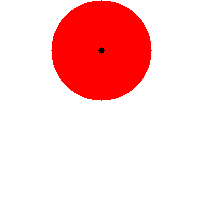

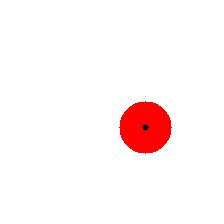

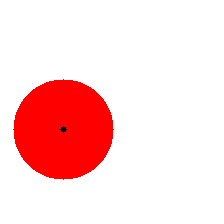

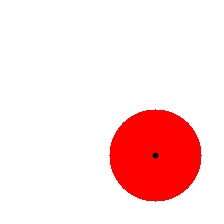

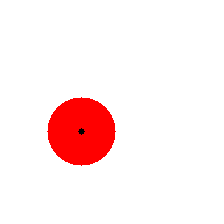

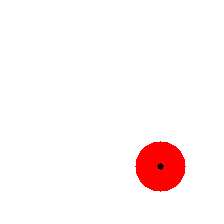

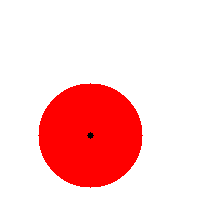

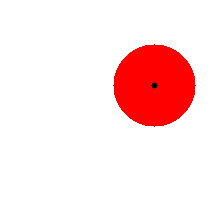

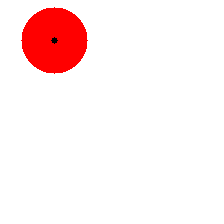

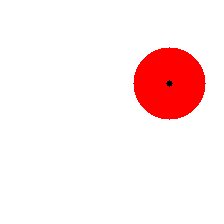

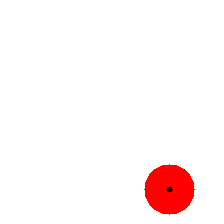

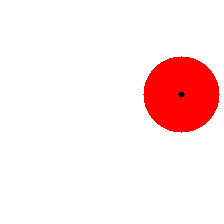

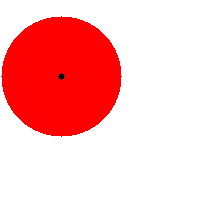

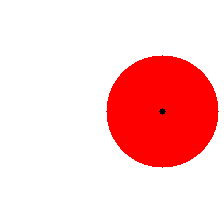

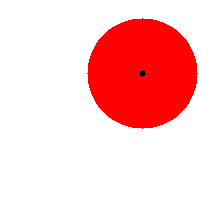

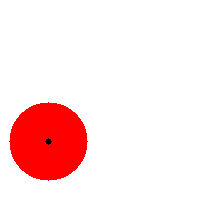

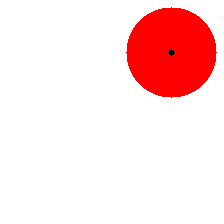

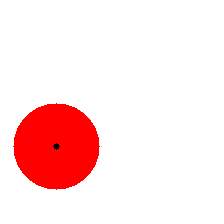

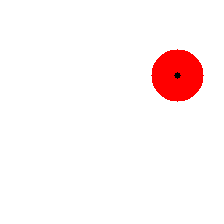

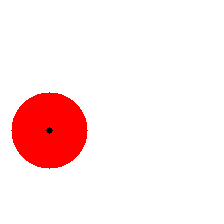

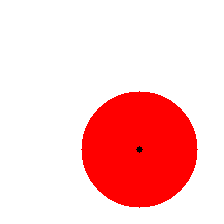

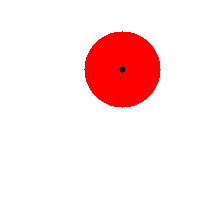

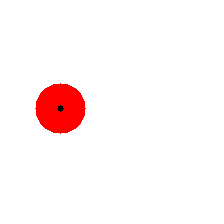

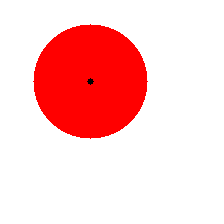

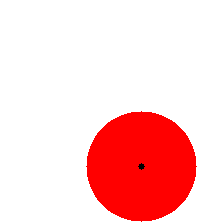

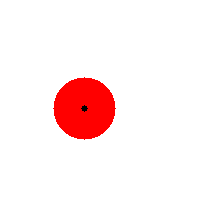

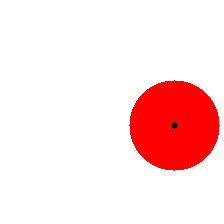

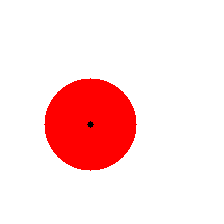

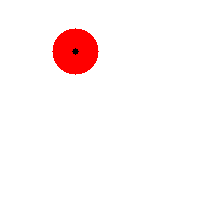

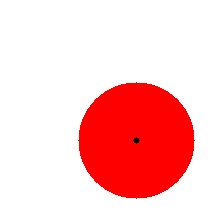

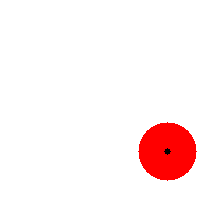

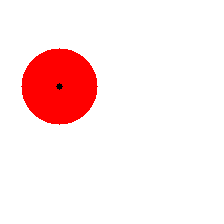

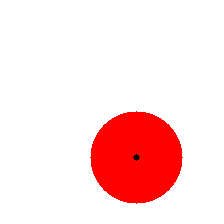

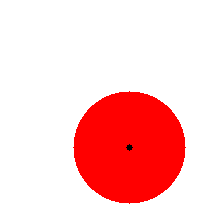

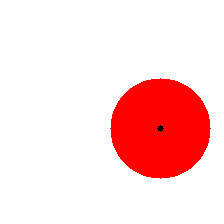

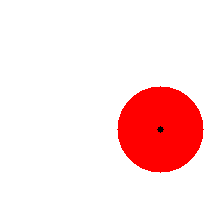

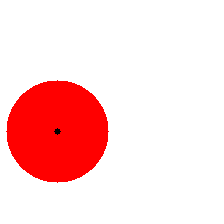

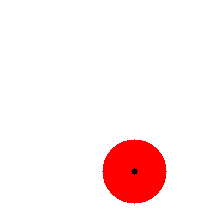

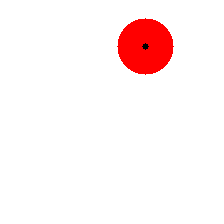

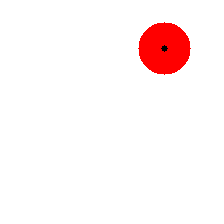

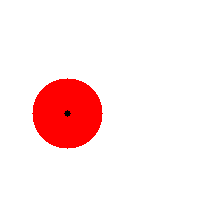

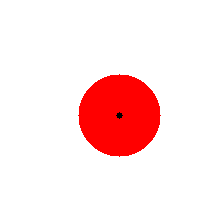

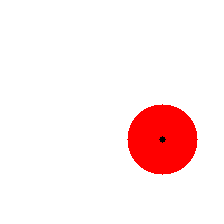

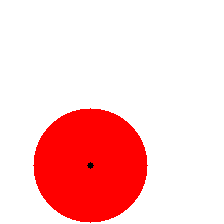

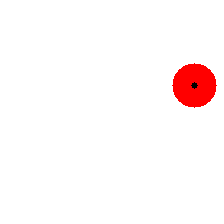

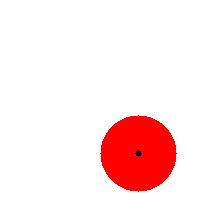

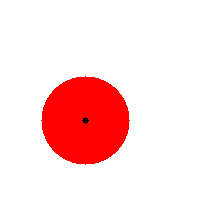

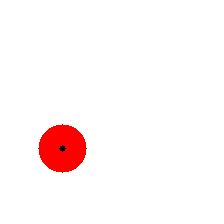

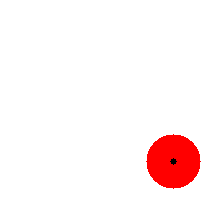

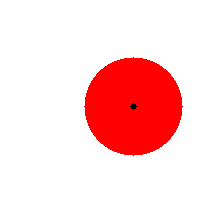

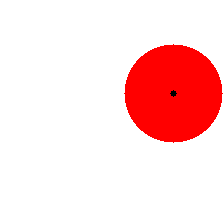

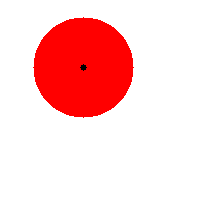

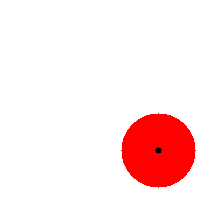

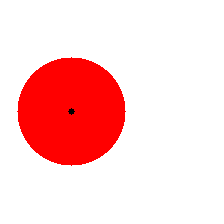

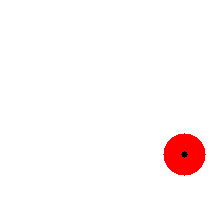

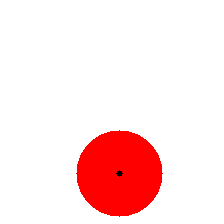

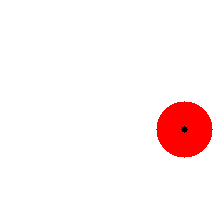

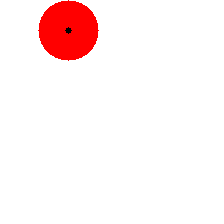

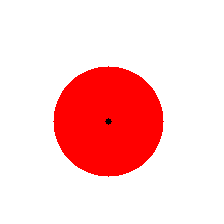

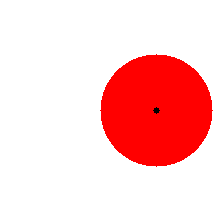

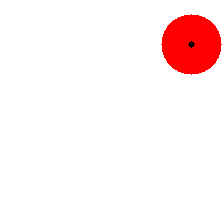

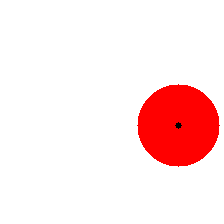

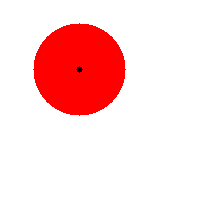

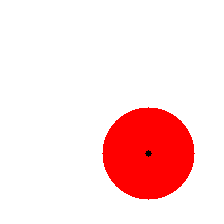

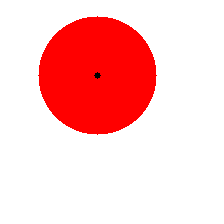

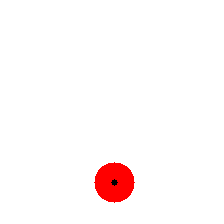

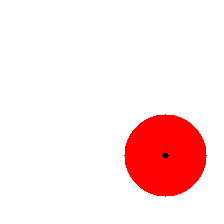

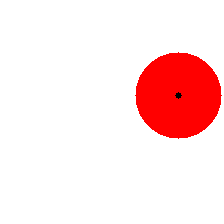

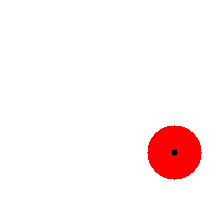

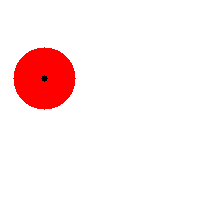

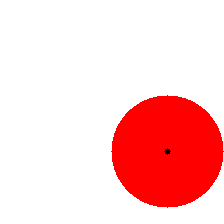

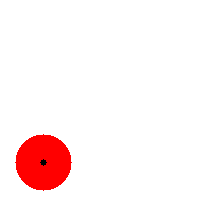

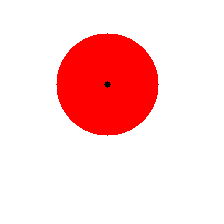

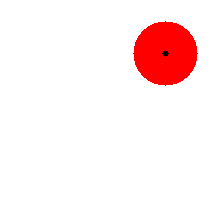

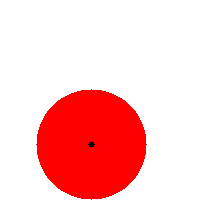

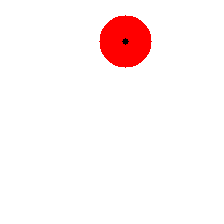

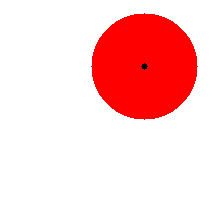

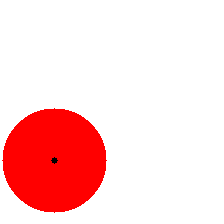

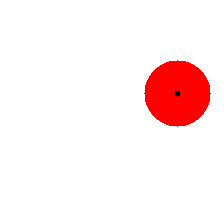

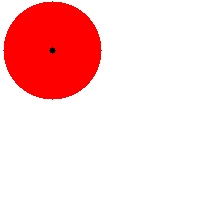

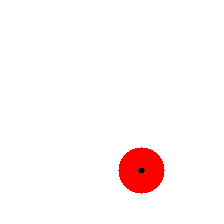

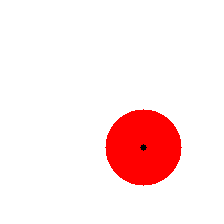

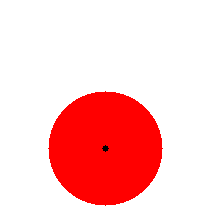

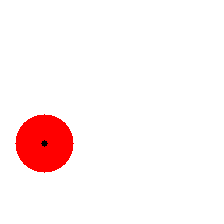

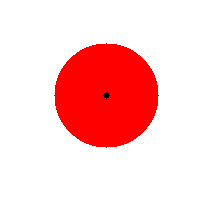

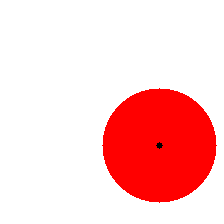

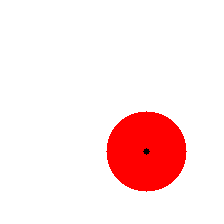

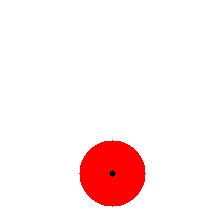

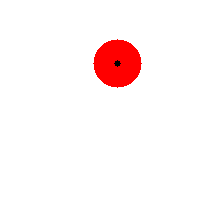

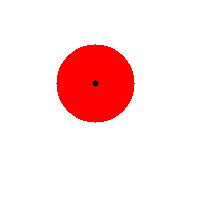

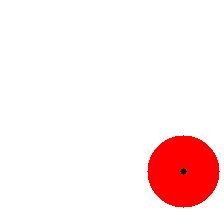

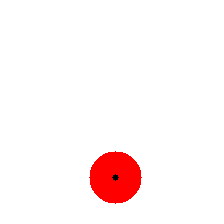

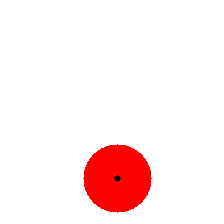

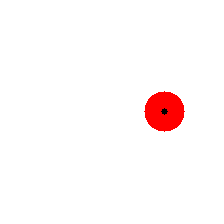

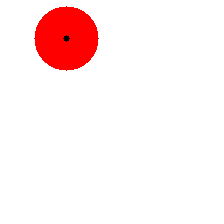

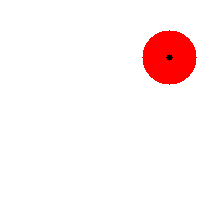

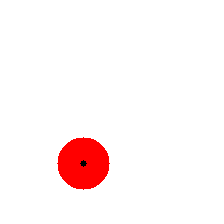

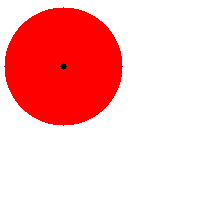

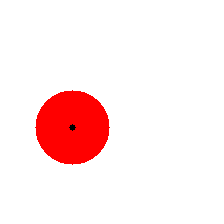

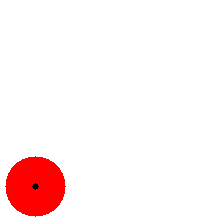

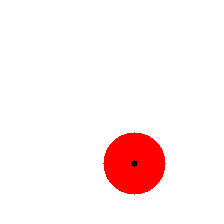

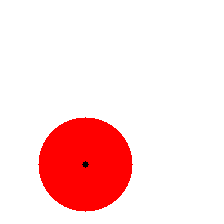

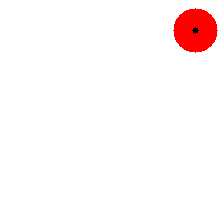

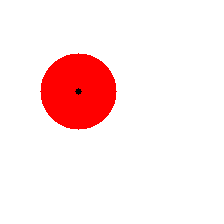

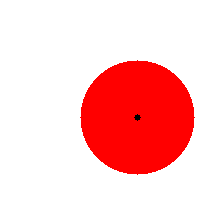

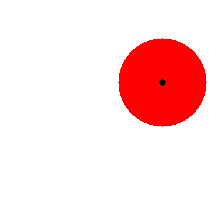

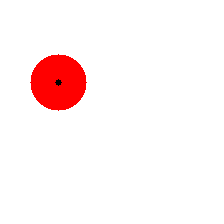

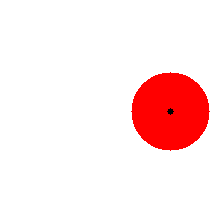

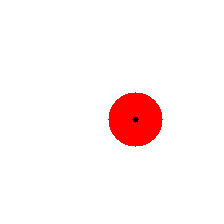

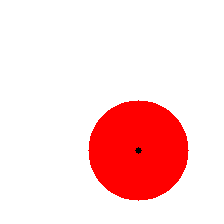

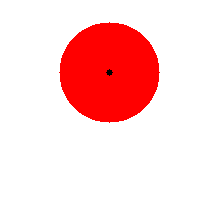

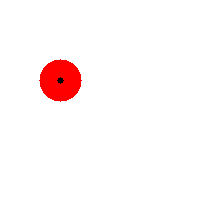

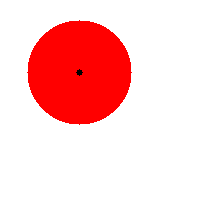

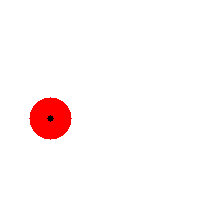

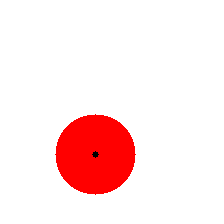

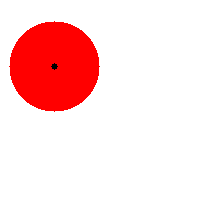

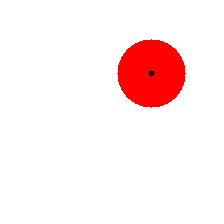

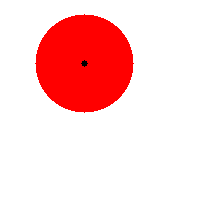

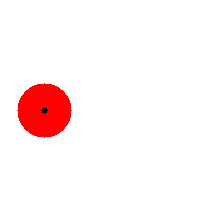

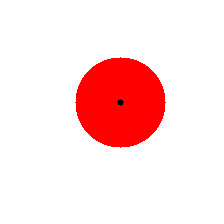

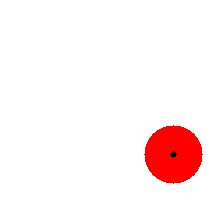

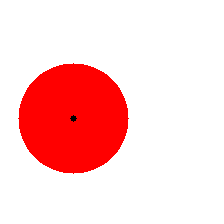

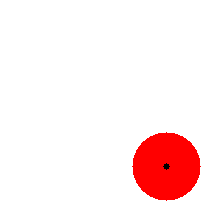

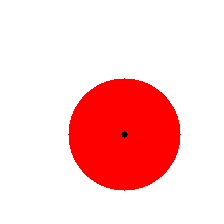

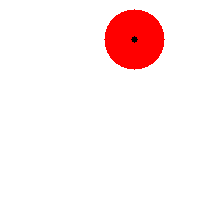

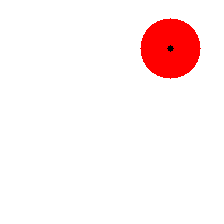

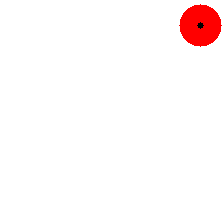

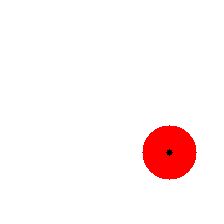

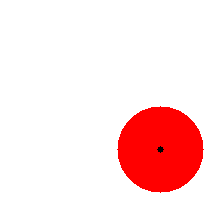

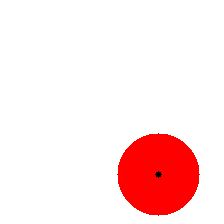

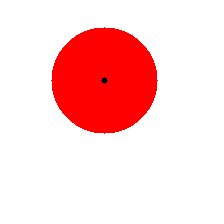

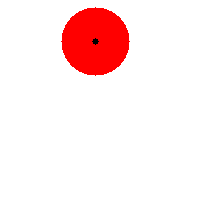

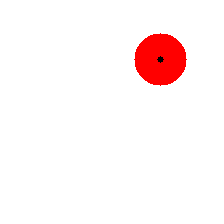

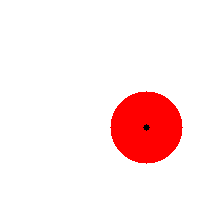

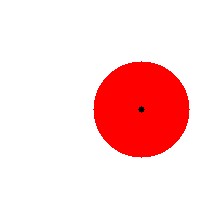

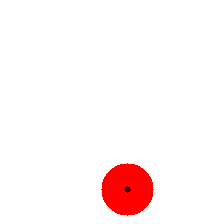

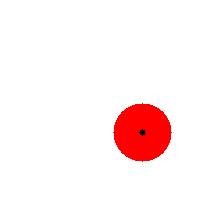

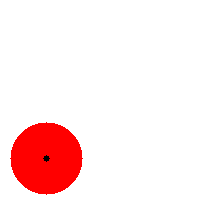

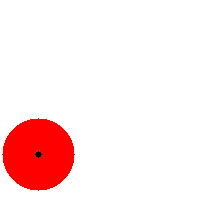

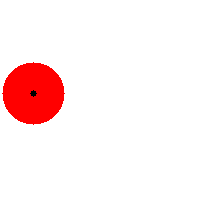

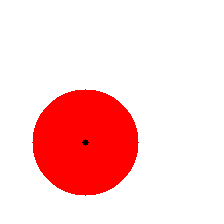

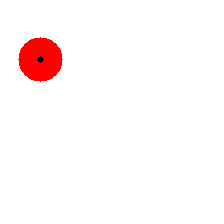

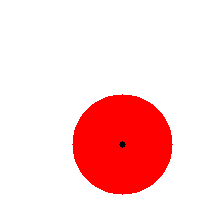

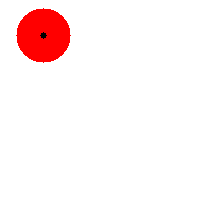

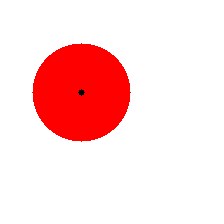

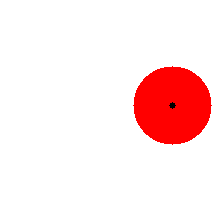

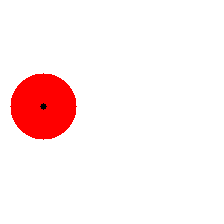

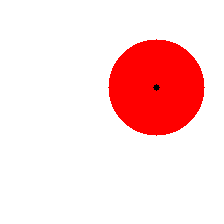

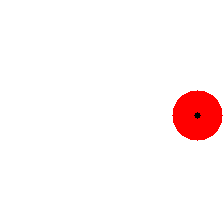

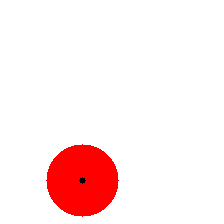

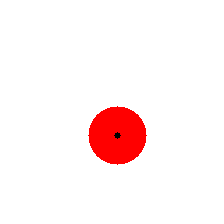

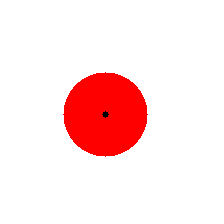

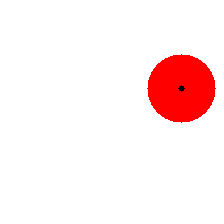

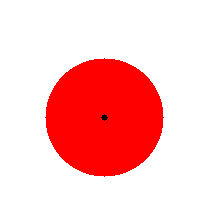

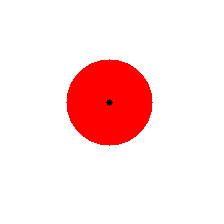

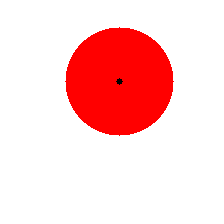

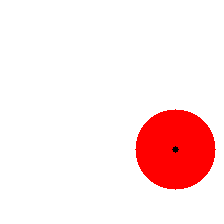

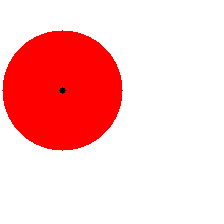

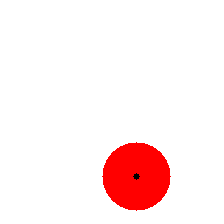

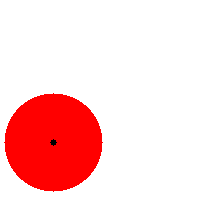

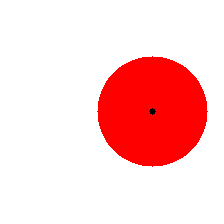

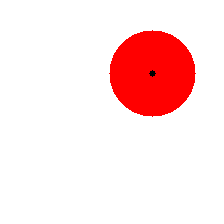

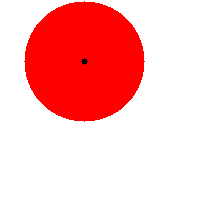

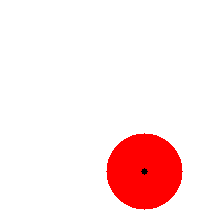

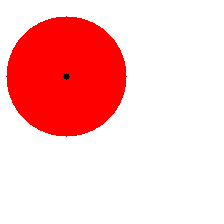

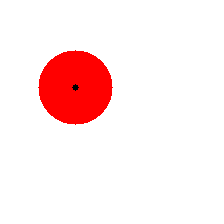

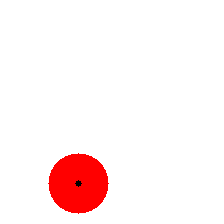

In [ ]:
# Generate test images
def generate_center(img_shape, circle_radius):
    img_height, img_width = img_shape[:2]
    # Ensure the circle stays away from image boundaries
    center_X = np.random.randint(circle_radius, img_width - circle_radius)
    center_Y = np.random.randint(circle_radius, img_height - circle_radius)
    return center_X, center_Y

# Create a directory to save the images
#os.makedirs("circle_images", exist_ok=True)

# Fixed circle radius


imgs_list =[]
img_center=[]
# Generate 2500 images
num_images = 500
for i in range(num_images):

    # Generate a random image with white background
    img = np.ones((224, 224, 3), dtype=np.uint8) * 255  # Image size is 224x224

    # Generate random circle properties
    circle_radius = random.randint(20, 60)
    circle_center = generate_center(img.shape, circle_radius)
    circle_color = (0, 0, 255)  # Red color

    # Draw the circle on the image
    cv2.circle(img, circle_center, circle_radius, circle_color, -1)

    # Draw a black dot at the circle's center
    cv2.circle(img, circle_center, 3, (0, 0, 0), -1)

    # Save the image with a corresponding title
    image_title = f"image_#{i+1}"
    #cv2.putText(img, image_title, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
    #cv2.imwrite(f"circle_images/{image_title}.jpg", img)

    # Display the image
    cv2_imshow(img)
    img_center.append(circle_center)
    imgs_list.append(img)

imgs_np = np.asarray(imgs_list)
imgs_np.shape
y = np.asarray(img_center)
X = imgs_np/255